In [1]:
# Automatic update of packages
%load_ext autoreload
%autoreload 2

In [2]:
from fontanka import *

/home/agalicina/anaconda3/envs/python37/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid import make_axes_locatable

from cooltools.lib import numutils

In [4]:
import datashader as ds
import datashader.transfer_functions as tf

INFO:numexpr.utils:Note: NumExpr detected 36 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.


## Reading 5.3 cooler
HiGlass view on sperm fountains: 
http://flemming.mit.edu:45687/l/?d=NgYoc8C0R7aEwPFwEiOJjQ 

HiGlass view on 5.3:
http://flemming.mit.edu:45687/l/?d=PDQdguwCQEa1l9fT_Bgn7g


Examples of various fountains:

http://flemming.mit.edu:45687/l/?d=I4nN9sadTMaMBwL4QK4_mA

http://flemming.mit.edu:45687/l/?d=G_-ahRA3TmSRu8_SZonpKw



HOXB locus:
http://flemming.mit.edu:45687/l/?d=c0RumA7NRUSyZ5Co7kHOyw

http://flemming.mit.edu:45687/l/?d=S-UNXb7rRuueOFKIKOO73A

There are certainly also TADs at 5.3:
http://flemming.mit.edu:45687/l/?d=CSojtVDrSki3sSznBfzC3Q

Insulation in HOXD depends on Nanog binding: 
http://flemming.mit.edu:45687/l/?d=dETE4LiTRLqvzkisaIBabA


HOXA does not have anything interesting: 
http://flemming.mit.edu:45687/l/?d=fO0U26zFTOK7fZAgmntLVw



Region with loop at 5.3: 
http://flemming.mit.edu:45687/l/?d=b04P1p7LQPOQBk6rDE8Fvw


Destiny of FOXP2: 
http://flemming.mit.edu:45687/l/?d=blz-Il21Sbmsk-HkNc2Kfg


Example of very conservative structure at 5.3 and in mutants: 
http://flemming.mit.edu:45687/l/?d=Kfopskz-RR69y2HXAQruPQ

Very early fountain/loop:

http://flemming.mit.edu:45687/l/?d=WtQx5FLwRCSGo0v3ku732A

Rather interesting locus: 

http://flemming.mit.edu:45687/l/?d=HIf65mT6QCunN7Yv_qkUqg


Very nice and adjusted from multiple mutants view: 
http://flemming.mit.edu:45687/l/?d=X3VeUbxNSYKaaWqgGtTyXw 

http://flemming.mit.edu:45687/l/?d=KpMdmmM_Tyi9RoJY7reBpw

Cdx4 locus with Sox gene:

http://flemming.mit.edu:45687/l/?d=ZdEDW1pYRvyAmhMjImqmaw


In [ ]:
label = 'Wild-Type_5.3'
resolution_kb = 25
resolution_bp = resolution_kb * 1000

In [ ]:
PATH = '/home/agalicina/DANIO/HIC/'

In [2]:
!ls /home/agalicina/DANIO/HIC/DATA_DANRER10/COOL/*.danrer10.mapq_30.1000.mcool

/home/agalicina/DANIO/HIC/DATA_DANRER10/COOL/embryos_2.3hpf.danrer10.mapq_30.1000.mcool
/home/agalicina/DANIO/HIC/DATA_DANRER10/COOL/embryos_24hpf.danrer10.mapq_30.1000.mcool
/home/agalicina/DANIO/HIC/DATA_DANRER10/COOL/embryos_4hpf.danrer10.mapq_30.1000.mcool
/home/agalicina/DANIO/HIC/DATA_DANRER10/COOL/embryos_8hpf.danrer10.mapq_30.1000.mcool
/home/agalicina/DANIO/HIC/DATA_DANRER10/COOL/MZnanog_2.75.danrer10.mapq_30.1000.mcool
/home/agalicina/DANIO/HIC/DATA_DANRER10/COOL/MZnanog_5.3.danrer10.mapq_30.1000.mcool
/home/agalicina/DANIO/HIC/DATA_DANRER10/COOL/MZsox19b_5.3.danrer10.mapq_30.1000.mcool
/home/agalicina/DANIO/HIC/DATA_DANRER10/COOL/MZspg_2.75.danrer10.mapq_30.1000.mcool
/home/agalicina/DANIO/HIC/DATA_DANRER10/COOL/MZspg_5.3.danrer10.mapq_30.1000.mcool
/home/agalicina/DANIO/HIC/DATA_DANRER10/COOL/NP.danrer10.mapq_30.1000.mcool
/home/agalicina/DANIO/HIC/DATA_DANRER10/COOL/PS.danrer10.mapq_30.1000.mcool
/home/agalicina/DANIO/HIC/DATA_DANRER10/COOL/SN.danrer10.mapq_30.1000.mcool
/

In [ ]:
coolpath = f'{PATH}/DATA_DANRER10/COOL/{label}.danrer10.mapq_30.1000.mcool::/resolutions/{resolution_bp}'
clr = cooler.Cooler(coolpath)
bins = clr.bins()[:]

In [ ]:
offset = 0

chroms_regions = [(chrom, 0, clr.chromsizes[chrom]) for chrom in clr.chromnames]
chromsizes = bioframe.fetch_chromsizes('danRer10', chrom_patterns=('^chr[0-9]+$', '^chrX$') )

In [ ]:
# Creation of genome-wide windows
flank_bp = 250_000
windows = snipping.make_bin_aligned_windows(
    resolution_bp, 
    bins['chrom'], 
    bins['start'],
    flank_bp=flank_bp)

# Assign genomic regions to windows:
supports = chroms_regions
windows = snipping.assign_regions(windows, supports).reset_index(drop=True)
windows.tail()

In [ ]:
# Create stack
stack = generate_ObsExpSnips(clr, windows, chroms_regions, nthreads=10)
stack.shape

In [ ]:
# Save stack
save_snips(stack, f'data/Snips_WholeGenome_{label}_Res{resolution_bp}_Flank{flank_bp}.npy')

In [15]:
size = 25

In [16]:
n_pos = double_triangle_mask(np.pi/4, size, fill_pos=1, fill_neg=0).sum()
n_neg = double_triangle_mask(np.pi/4, size, fill_pos=0, fill_neg=1).sum()
mask_norm = double_triangle_mask(np.pi/4, size, fill_pos=1/n_pos, fill_neg=-1/n_neg)
mask_pos  = double_triangle_mask(np.pi/4, size, fill_pos=1/n_pos, fill_neg=0)

In [17]:
# Create track with metadata: 
fs_track     = generate_fountain_score( stack, kernel=mask_norm)
scharr_track = generate_scharr_score(   stack, kernel=mask_pos)

# Track of genome coverage:
from cooltools.coverage import get_coverage
cis_coverage, tot_coverage = get_coverage(clr)

metadata = windows.copy()
metadata['FS']     = fs_track # Average OEE in the fountain divided by average OOE outside of it

# Note that bad bins are not filtered out:
metadata['FS_peaks'] = metadata.groupby('chrom')['FS'].transform(get_peaks_prominence)

metadata['Scharr'] = scharr_track # Average Scharr in the fountain
metadata['total_coverage'] = tot_coverage
metadata['cis_coverage']   = cis_coverage

metadata['mid'] = (metadata.end+metadata.start)//2

In [18]:
# Visualizae randomly picked fountain:
metadata.query('chrom=="chr1" and mid<=10_320_000 and mid>=10_100_000')

chrom     start       end    lo    hi           region        FS  \
1010  chr1   9850000  10360000   985  1036  chr1:0-58871917 -0.000011   
1011  chr1   9860000  10370000   986  1037  chr1:0-58871917  0.000009   
1012  chr1   9870000  10380000   987  1038  chr1:0-58871917  0.000019   
1013  chr1   9880000  10390000   988  1039  chr1:0-58871917  0.000025   
1014  chr1   9890000  10400000   989  1040  chr1:0-58871917  0.000056   
1015  chr1   9900000  10410000   990  1041  chr1:0-58871917  0.000060   
1016  chr1   9910000  10420000   991  1042  chr1:0-58871917  0.000096   
1017  chr1   9920000  10430000   992  1043  chr1:0-58871917  0.000117   
1018  chr1   9930000  10440000   993  1044  chr1:0-58871917  0.000140   
1019  chr1   9940000  10450000   994  1045  chr1:0-58871917  0.000155   
1020  chr1   9950000  10460000   995  1046  chr1:0-58871917  0.000164   
1021  chr1   9960000  10470000   996  1047  chr1:0-58871917  0.000153   
1022  chr1   9970000  10480000   997  1048  chr1:0-58871917  0.000146   
1023  chr1   9980000  10490000   998  1049  chr1:0-58871917  0.000126   
1024  chr1   9990000  10500000   999  1050  chr1:0-58871917  0.000115   
1025  chr1  10000000  10510000  1000  1051  chr1:0-58871917  0.000110   
1026  chr1  10010000  10520000  1001  1052  chr1:0-58871917  0.000095   
1027  chr1  10020000  10530000  1002  1053  chr1:0-58871917  0.000076   
1028  chr1  10030000  10540000  1003  1054  chr1:0-58871917  0.000049   
1029  chr1  10040000  10550000  1004  1055  chr1:0-58871917  0.000042   
1030  chr1  10050000  10560000  1005  1056  chr1:0-58871917  0.000038   
1031  chr1  10060000  10570000  1006  1057  chr1:0-58871917  0.000012   

      FS_peaks    Scharr  total_coverage  cis_coverage       mid  
1010       NaN  0.055437           689.5         523.5  10105000  
1011       NaN  0.115070           694.0         518.5  10115000  
1012       NaN  0.059735           877.5         674.0  10125000  
1013       NaN  0.103148           653.0         497.0  10135000  
1014       NaN  0.084132           607.5         443.5  10145000  
1015       NaN  0.081735           718.0         548.5  10155000  
1016       NaN  0.081735           708.0         526.5  10165000  
1017       NaN  0.081735           821.5         593.5  10175000  
1018       NaN  0.081735           834.5         610.5  10185000  
1019       NaN  0.081735           753.5         547.0  10195000  
1020   0.00026  0.081735           919.5         668.0  10205000  
1021       NaN  0.081735           681.5         498.5  10215000  
1022       NaN  0.081735           742.0         546.5  10225000  
1023       NaN  0.097643           803.5         597.0  10235000  
1024       NaN  0.081735           818.5         627.5  10245000  
1025       NaN  0.081735           674.0         509.0  10255000  
1026       NaN  0.089313           601.0         482.0  10265000  
1027       NaN  0.104778           832.0         648.5  10275000  
1028       NaN  0.061626           543.5         420.0  10285000  
1029       NaN  0.057209           612.5         453.0  10295000  
1030       NaN  0.051240           791.0         580.0  10305000  
1031       NaN  0.062681           575.5         452.0  10315000

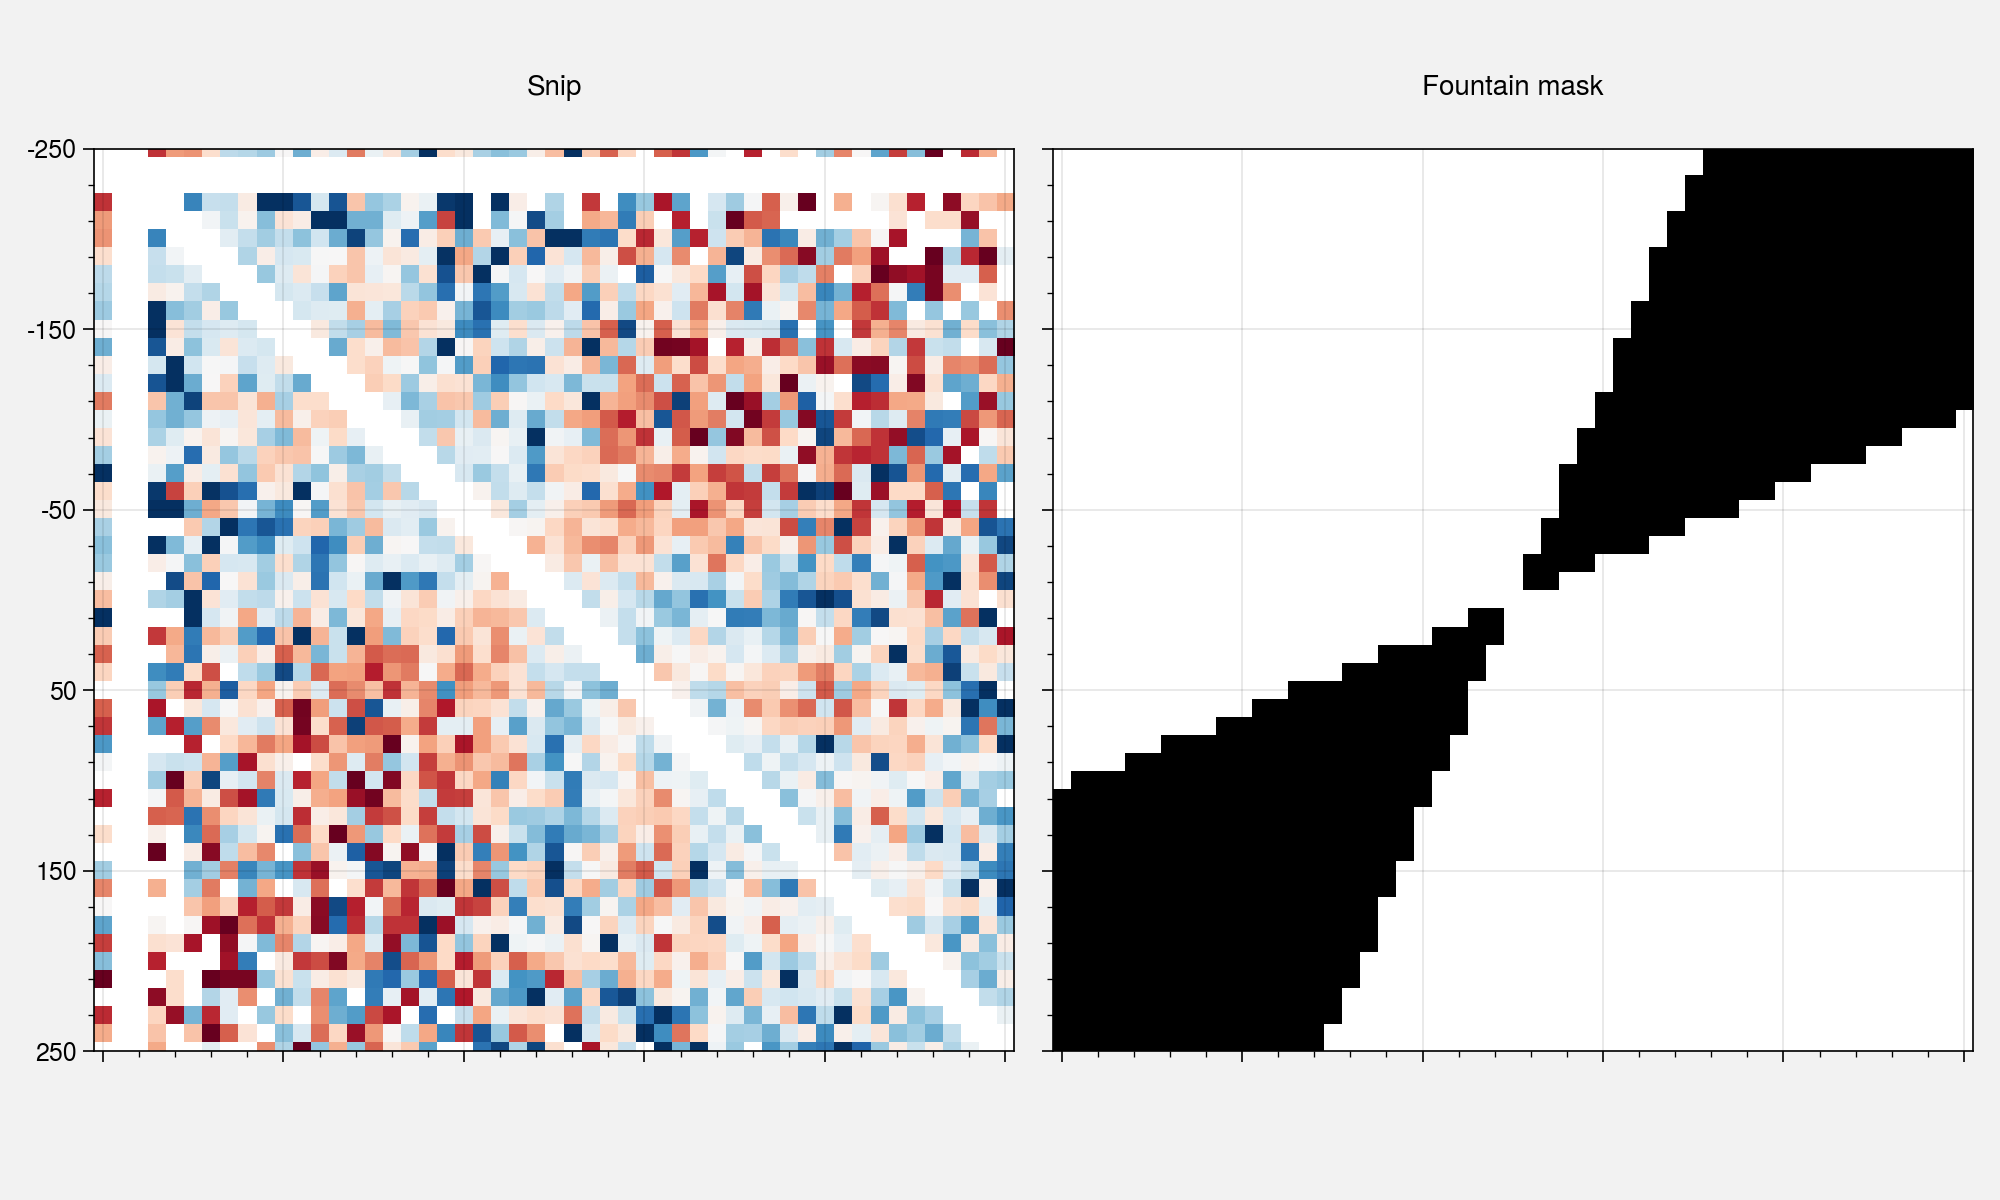

In [19]:
snip = stack[:, :, 408]

f, axs = plt.subplots(
    figsize=(10, 6),
    nrows=1, 
    ncols=2,
    sharex=True, 
    sharey=True)

ax = axs[0]
ax.set_title('Snip')
im = ax.matshow(np.log2(snip), cmap='RdBu_r', vmax=1.5, vmin=-1.5); 

ax = axs[1]
ax.set_title('Fountain mask')
im1 = ax.matshow(mask_norm, cmap='fall'); 

ticks = np.arange(0, len(mask_norm), 10)
ticklabels = (ticks*resolution_bp - flank_bp)//1000
for ax in axs:
    ax.set_yticks(ticks)
    ax.set_yticklabels(ticklabels)
    ax.set_xticks(ticks)
    ax.set_xticklabels([])
    ax.xaxis.tick_bottom()

f.tight_layout()

In [20]:
mtx = clr.matrix(as_pixels=False, balance=True).fetch('chr1')
for i in range(2):
    np.fill_diagonal(mtx[i:, :], np.nan)
    np.fill_diagonal(mtx[:, i:], np.nan)
image = np.log2(numutils.observed_over_expected(mtx, mask=np.isfinite(mtx))[0])

In [21]:
FS_threshold = np.nanpercentile(metadata['FS_peaks'], 80)

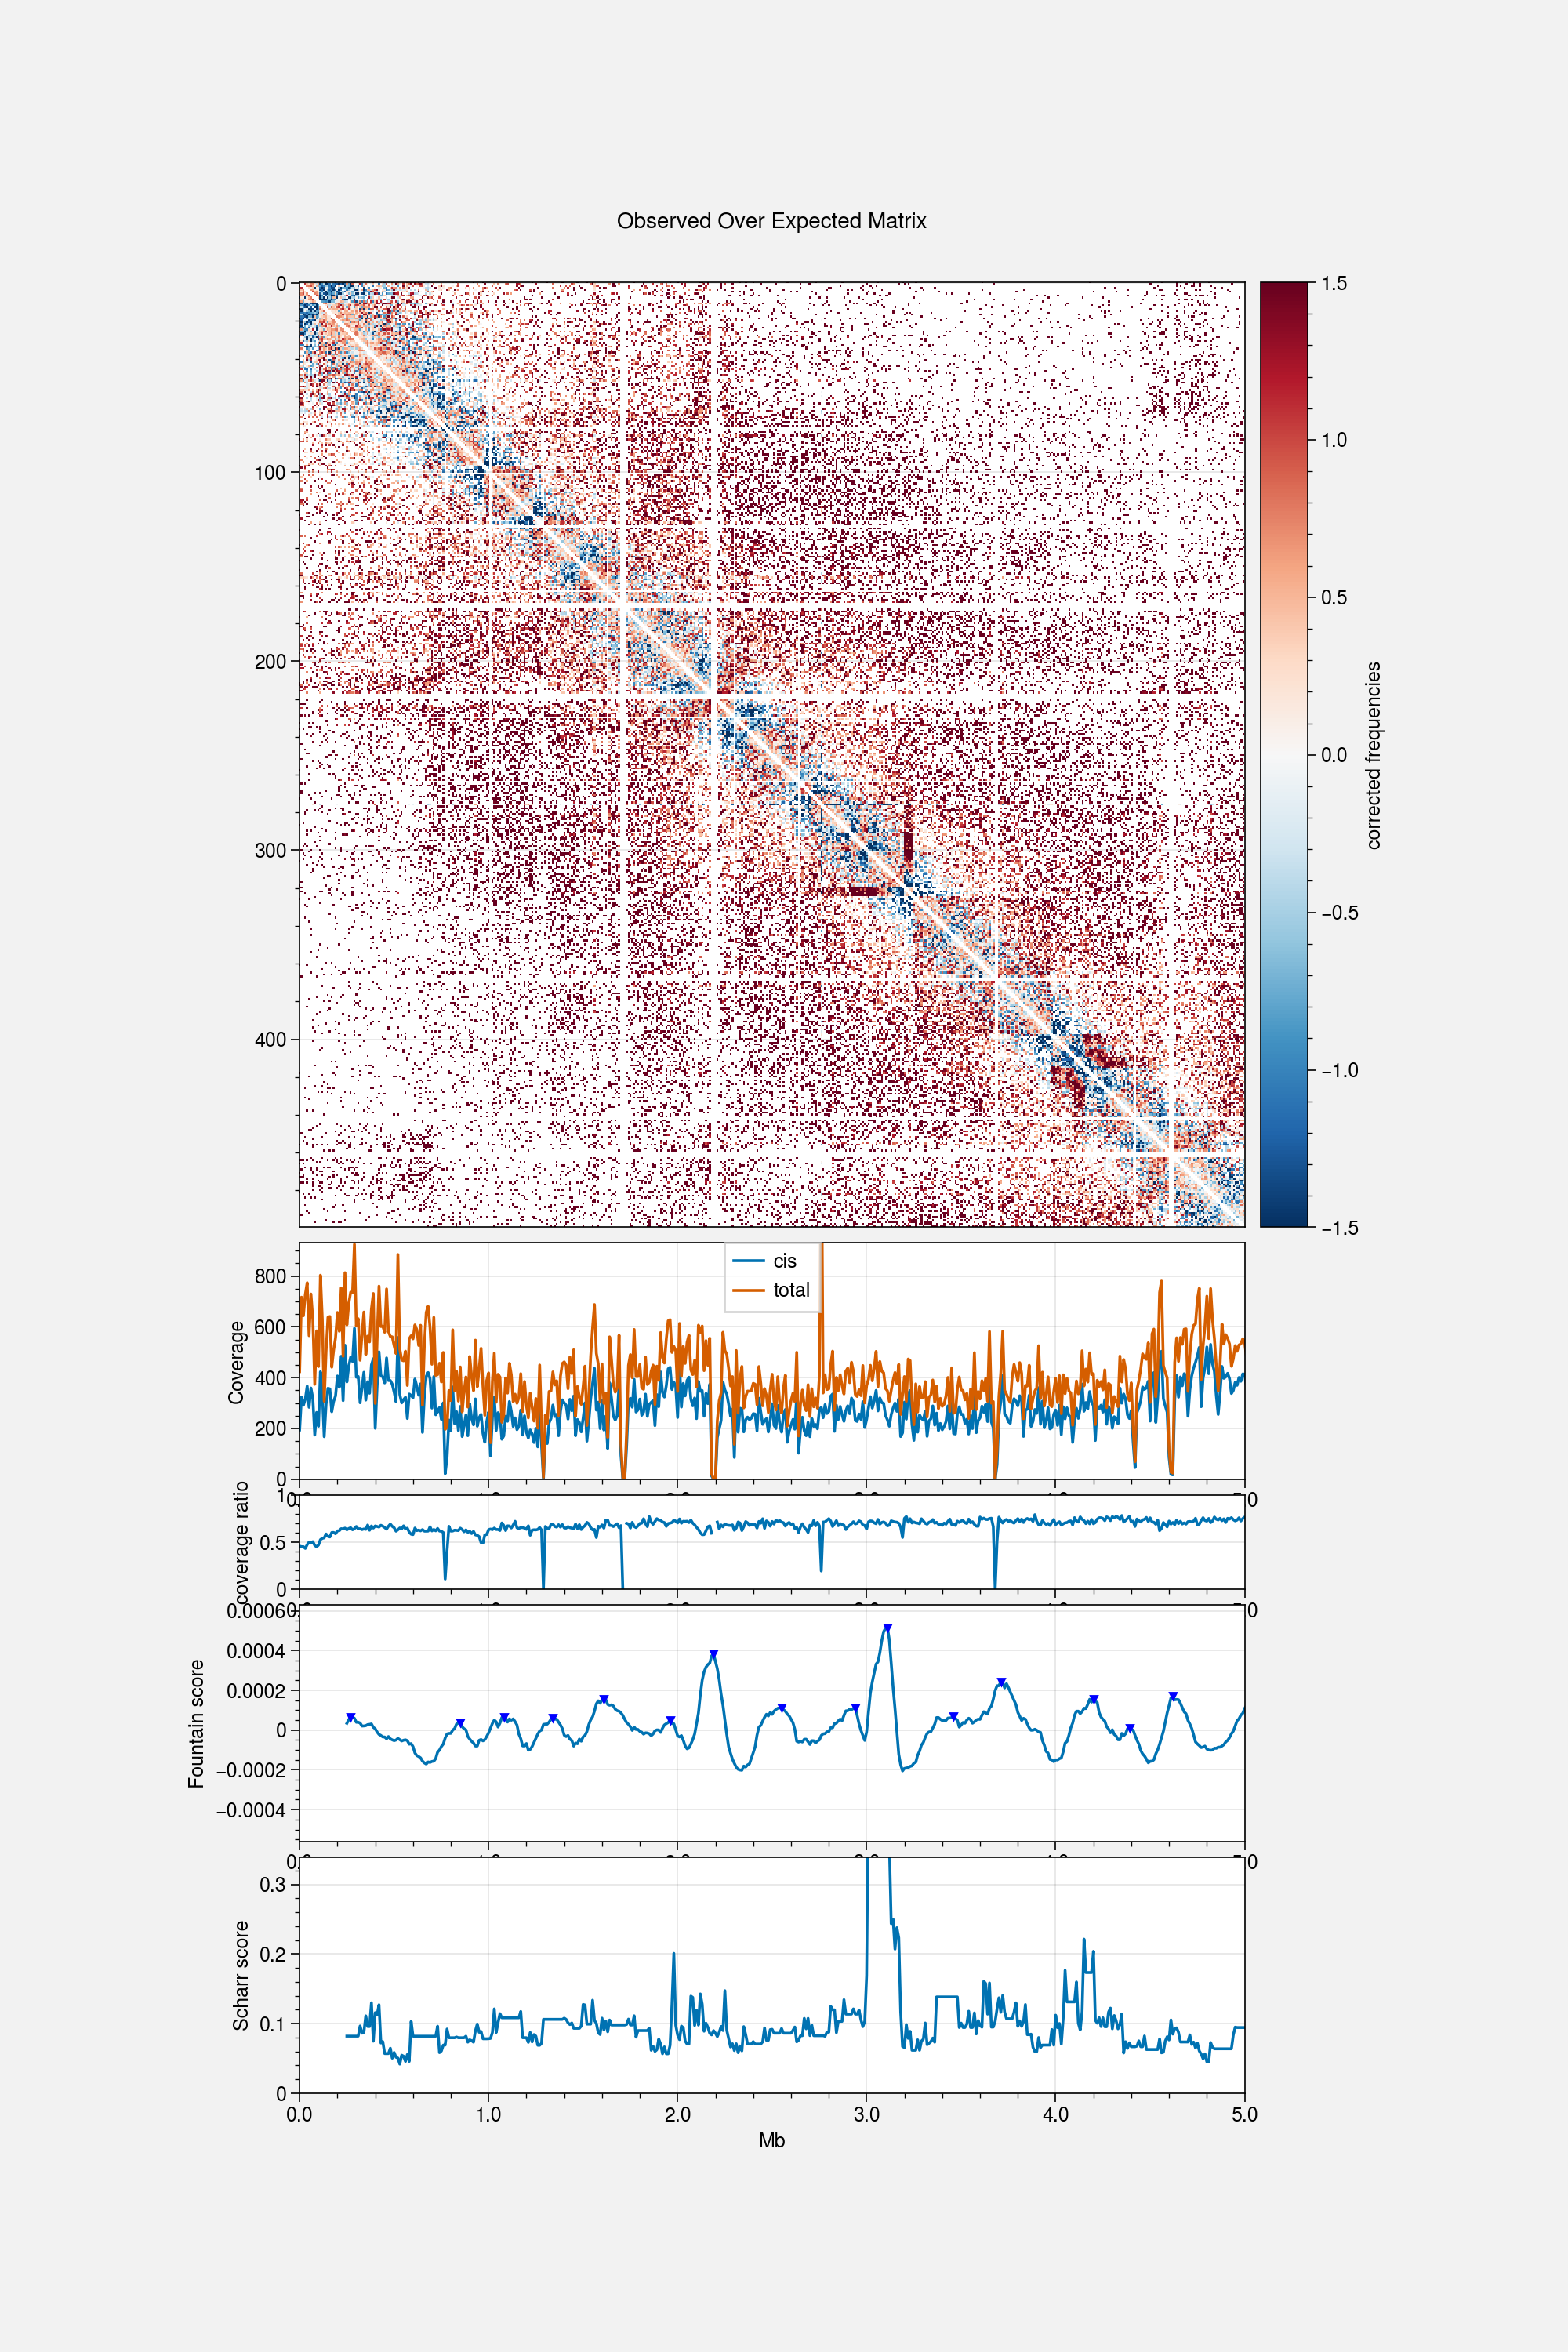

In [22]:
start, end = 0, 500
xticks = np.arange(start, end+1, 100)
xticks_kb = (xticks*resolution_bp)/1000000

f, ax = plt.subplots(
    figsize=(10, 15),
    sharex=True, 
)

im = ax.matshow(
    image[start:end, start:end], 
    vmax=1.5, vmin=-1.5,
    cmap='RdBu_r'
); 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax, label='corrected frequencies');
ax.set_title('Observed Over Expected Matrix')
ax.xaxis.set_visible(False)

ax1 = divider.append_axes("bottom", size="25%", pad=0.1, sharex=ax)
ax1.plot( metadata['cis_coverage'],   label='cis')
ax1.plot( metadata['total_coverage'], label='total')
ax1.set_xlim([start, end])
ax1.set_ylim([0, np.nanpercentile(metadata['total_coverage'], 99)])
ax1.set_ylabel('Coverage')
ax1.legend()

ax2 = divider.append_axes("bottom", size="10%", pad=0.1, sharex=ax)
ax2.plot( metadata['cis_coverage'] / metadata['total_coverage'] )
ax2.set_xlim([start, end])
ax2.set_ylabel('coverage ratio')

ax3 = divider.append_axes("bottom", size="25%", pad=0.1, sharex=ax)
ax3.plot( metadata['FS'] )
ax3.set_xlim([start, end])
ax3.set_ylim([np.nanpercentile(metadata['FS'], 1), np.nanpercentile(metadata['FS'], 99)])
ax3.set_ylabel('Fountain score')

for i in range(start, end):
    fs = metadata['FS_peaks'][i]
    if not np.isnan(fs) and fs>FS_threshold:
        ax3.plot(i-start, metadata['FS'][i], marker='v', color='blue', ms=3)
        
ax4 = divider.append_axes("bottom", size="25%", pad=0.1, sharex=ax)
ax4.plot( metadata['Scharr'] )
ax4.set_xlim([start, end])
ax4.set_ylim([np.nanpercentile(metadata['Scharr'], 1), np.nanpercentile(metadata['Scharr'], 99)])
ax4.set_ylabel('Scharr score')


# ax1.xaxis.set_visible(False)
# ax2.xaxis.set_visible(False)
# ax3.xaxis.set_visible(False)
ax4.set(xticks=xticks, xticklabels=xticks_kb, xlabel='Mb')

f.show()

## PCA of a typical fountain

In [23]:
snip_size = size*2+1

In [25]:
FS_threshold = np.nanpercentile(metadata['FS_peaks'], 80)
selected = metadata.dropna(axis=0, subset=['FS_peaks']).query(f'FS_peaks>{FS_threshold}')

In [26]:
avg_fountain = np.nanmean( stack[:, :, selected.index], axis=2)
eigs_fountain = get_eig(avg_fountain, n_eigs=snip_size)
# Phasing the eigenvectors by the first value, which it arbitrary
vect = eigs_fountain[:, 0]
eigs_fountain = flip_eigs(eigs_fountain, vect)

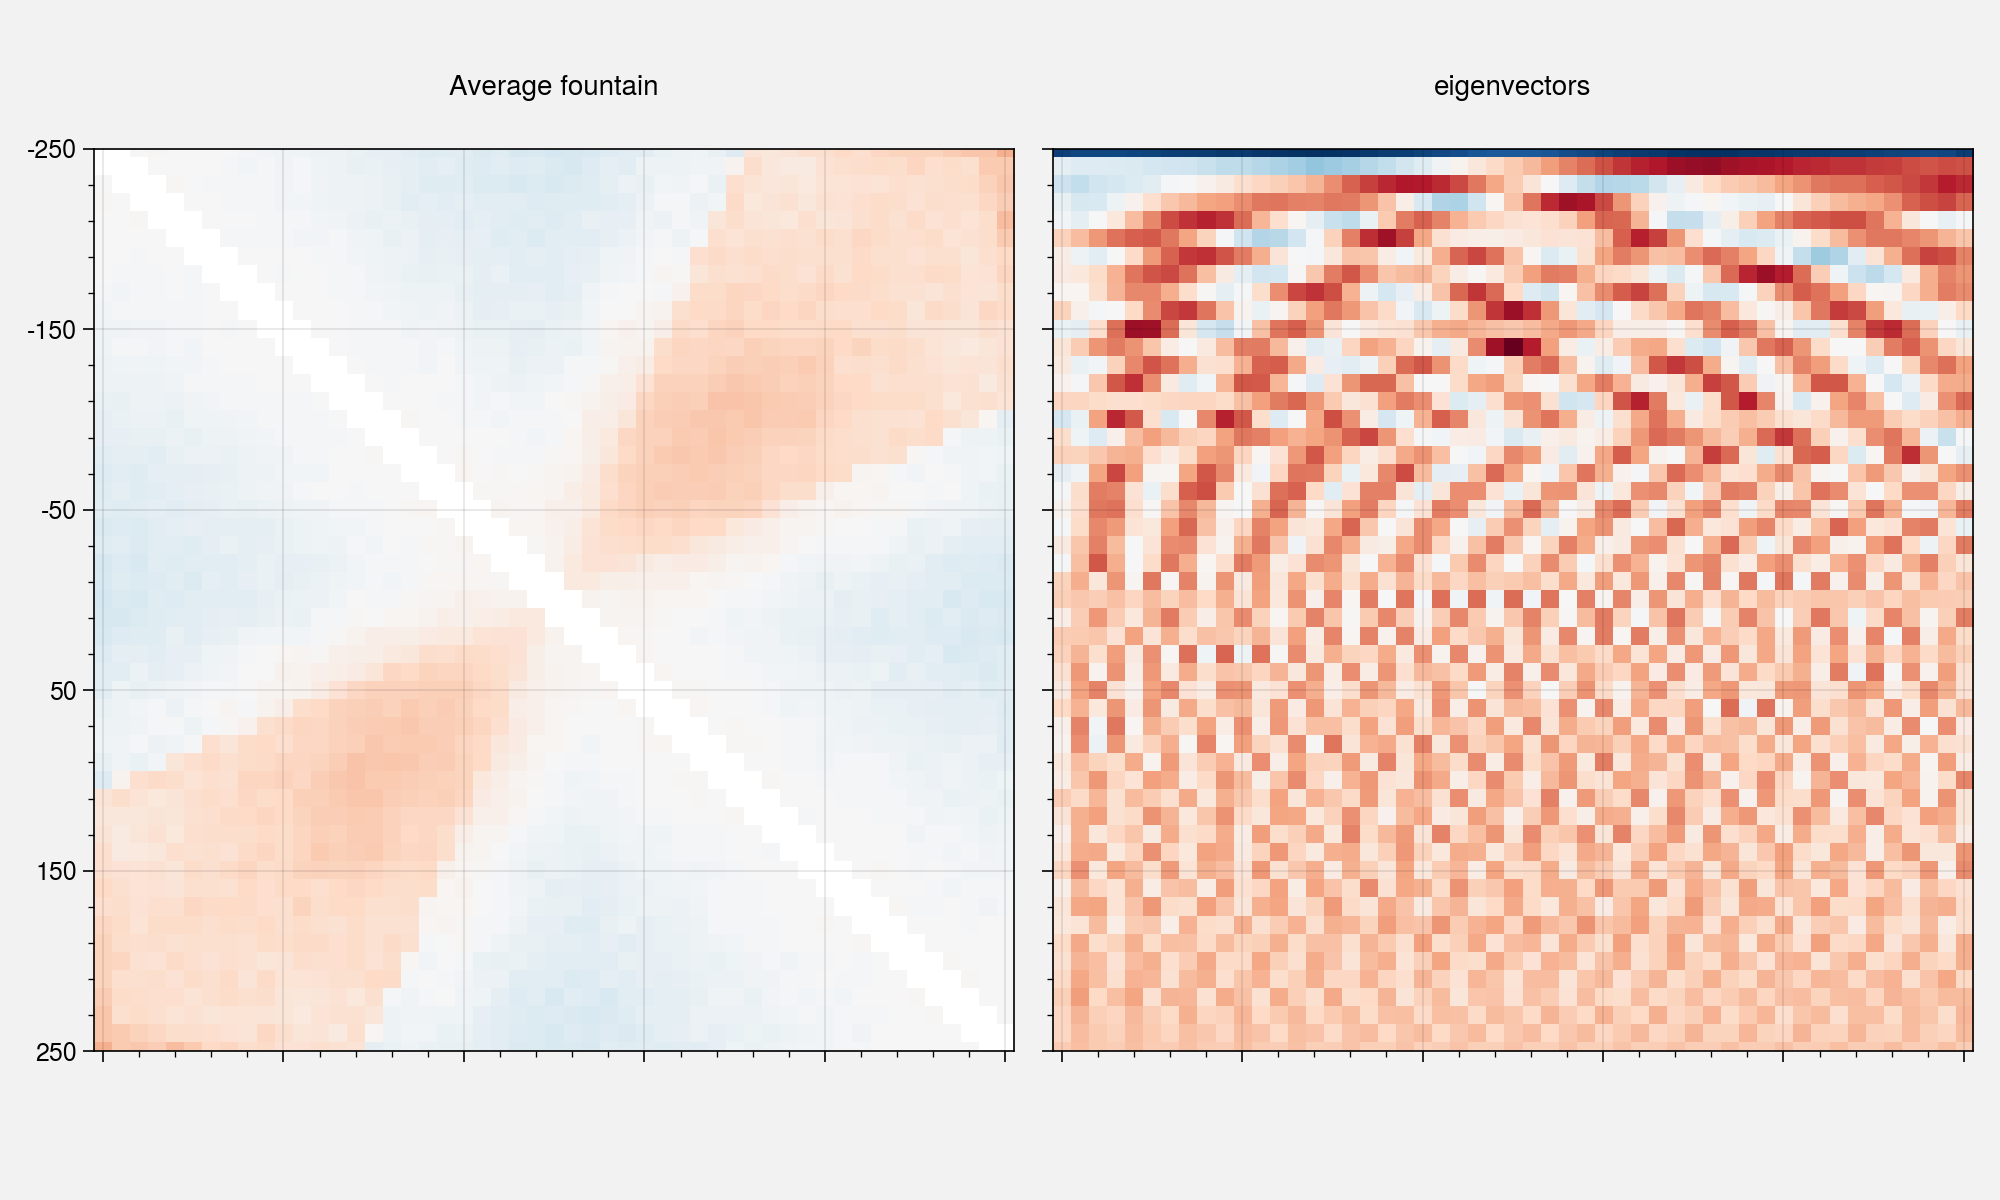

In [27]:
f, axs = plt.subplots(
    figsize=(10, 6),
    nrows=1, 
    ncols=2,
    sharex=True, 
    sharey=True)

ax = axs[0]
ax.set_title('Average fountain')
im = ax.matshow(np.log2(avg_fountain), cmap='RdBu_r', vmax=1.5, vmin=-1.5); 

ax = axs[1]
ax.set_title('eigenvectors')
im1 = ax.matshow(eigs_fountain, cmap='RdBu'); 

ticks = np.arange(0, snip_size, 10)
ticklabels = (ticks*resolution_bp - flank_bp)//1000
for ax in axs:
    ax.set_yticks(ticks)
    ax.set_yticklabels(ticklabels)
    ax.set_xticks(ticks)
    ax.set_xticklabels([])
    ax.xaxis.tick_bottom()

f.tight_layout()

In [28]:
snip = stack[:, :, 408]
eigs = get_eig(snip, n_eigs=snip_size)
# Phasing the eigenvectors by sign of pearson correlation with idealized fountain:
vect = np.array( [scipy.stats.pearsonr(eigs_fountain[i, :], eigs[i, :])[0] for i in range(snip_size)] )
eigs = flip_eigs(eigs, vect)

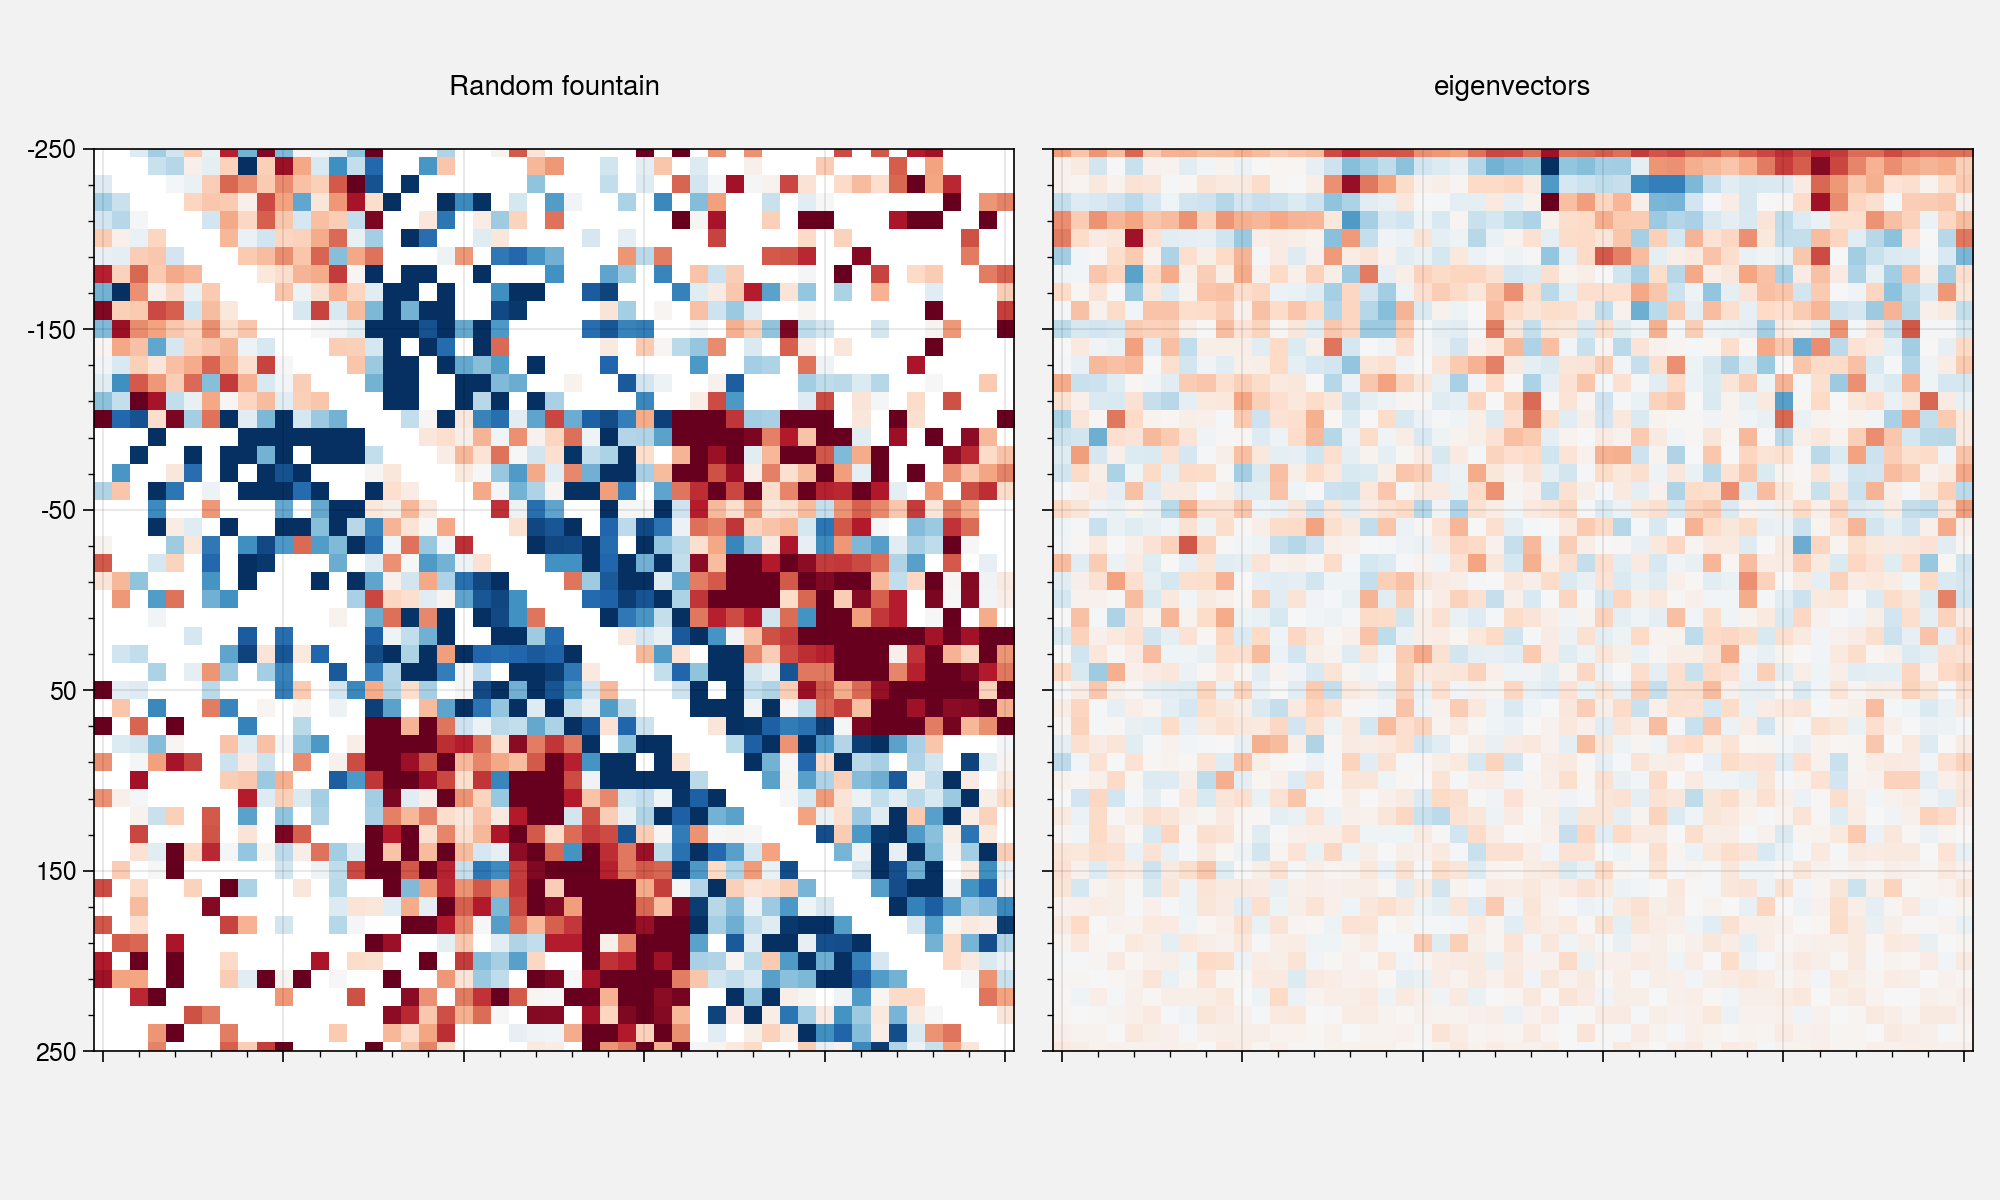

In [29]:
f, axs = plt.subplots(
    figsize=(10, 6),
    nrows=1, 
    ncols=2,
    sharex=True, 
    sharey=True)

ax = axs[0]
ax.set_title('Random fountain')
im = ax.matshow(np.log2(snip), cmap='RdBu_r', vmax=1.5, vmin=-1.5); 

ax = axs[1]
ax.set_title('eigenvectors')
im1 = ax.matshow(eigs, cmap='RdBu'); 

ticks = np.arange(0, snip_size, 10)
ticklabels = (ticks*resolution_bp - flank_bp)//1000
for ax in axs:
    ax.set_yticks(ticks)
    ax.set_yticklabels(ticklabels)
    ax.set_xticks(ticks)
    ax.set_xticklabels([])
    ax.xaxis.tick_bottom()

f.tight_layout()

In [30]:
snip = stack[:, :, 401]
eigs = get_eig(snip, n_eigs=snip_size)
# Phasing the eigenvectors by sign of pearson correlation with idealized fountain:
vect = np.array( [scipy.stats.pearsonr(eigs_fountain[i, :], eigs[i, :])[0] for i in range(snip_size)] )
eigs = flip_eigs(eigs, vect)

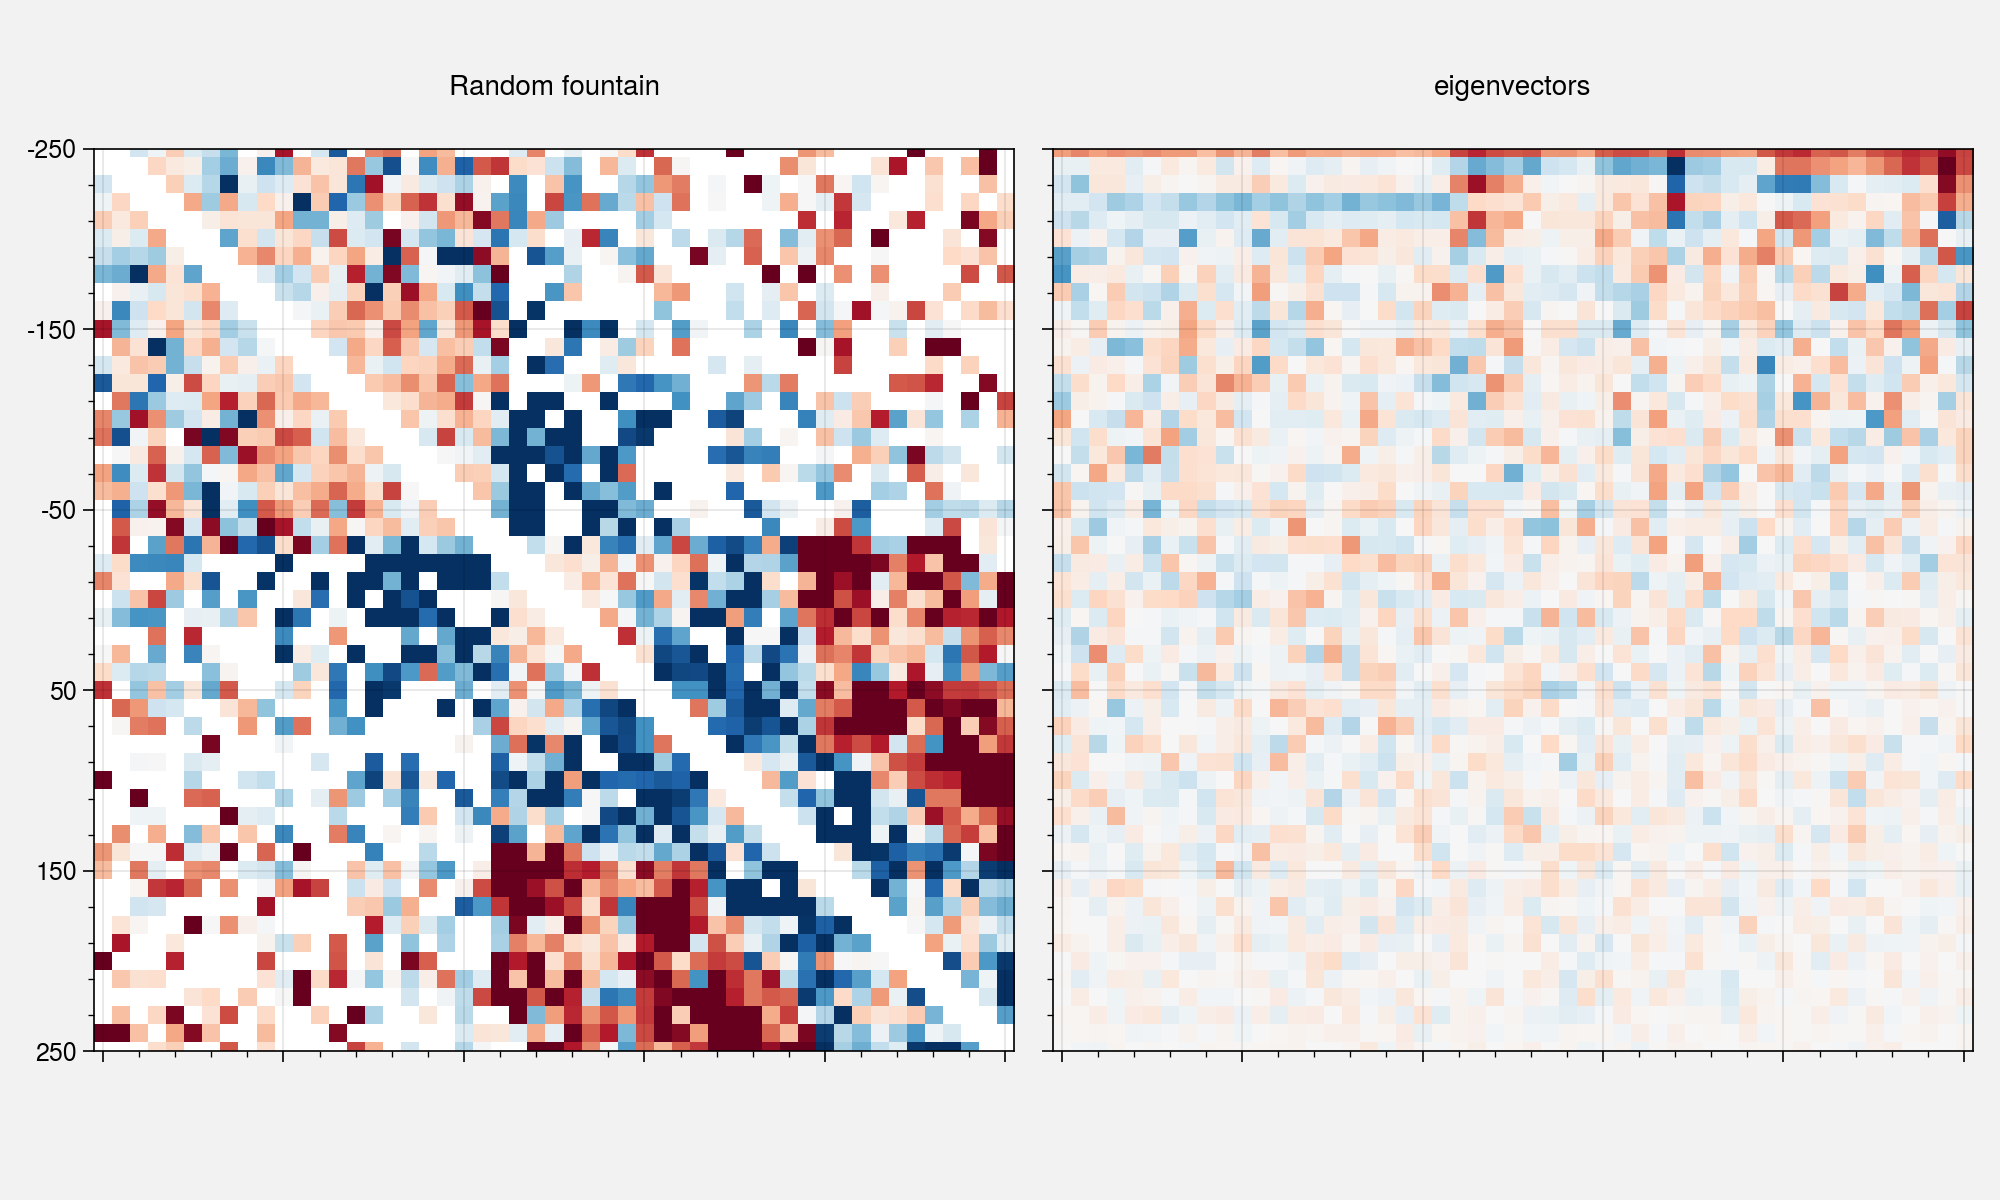

In [31]:
f, axs = plt.subplots(
    figsize=(10, 6),
    nrows=1, 
    ncols=2,
    sharex=True, 
    sharey=True)

ax = axs[0]
ax.set_title('Random fountain')
im = ax.matshow(np.log2(snip), cmap='RdBu_r', vmax=1.5, vmin=-1.5); 

ax = axs[1]
ax.set_title('eigenvectors')
im1 = ax.matshow(eigs, cmap='RdBu'); 

ticks = np.arange(0, snip_size, 10)
ticklabels = (ticks*resolution_bp - flank_bp)//1000
for ax in axs:
    ax.set_yticks(ticks)
    ax.set_yticklabels(ticklabels)
    ax.set_xticks(ticks)
    ax.set_xticklabels([])
    ax.xaxis.tick_bottom()

f.tight_layout()

In [32]:
# Small correlation map for the fountain position
correlations = np.zeros([snip_size, snip_size])

for i in range(snip_size):
    for j in range(snip_size):
        correlations[i, j] = scipy.stats.pearsonr( eigs[i, :], eigs_fountain[j, :])[0]


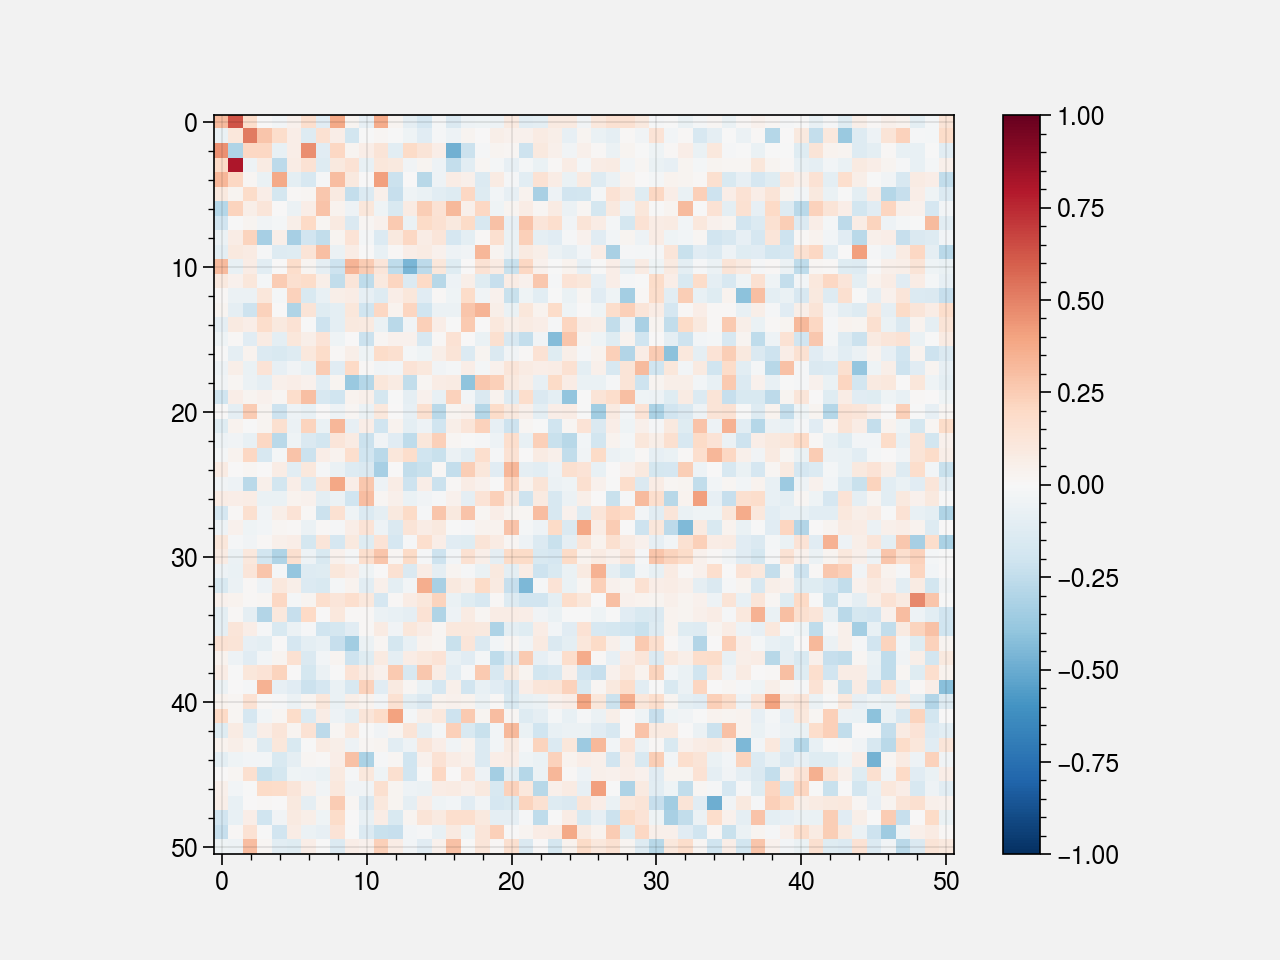

In [33]:
plt.imshow( correlations, cmap='RdBu_r', vmax=1, vmin=-1)
plt.colorbar()

## Embedding of all the windows

In [43]:
n_eigs = 5
genome_size = len(windows)

In [37]:
components = get_components(stack, n_eigs)

In [38]:
components_flipped = flip_sign(components, n_eigs, eigs_fountain[1:1+n_eigs, :])

In [39]:
components.shape, components_flipped.shape

((5, 51, 134058), (5, 51, 134058))

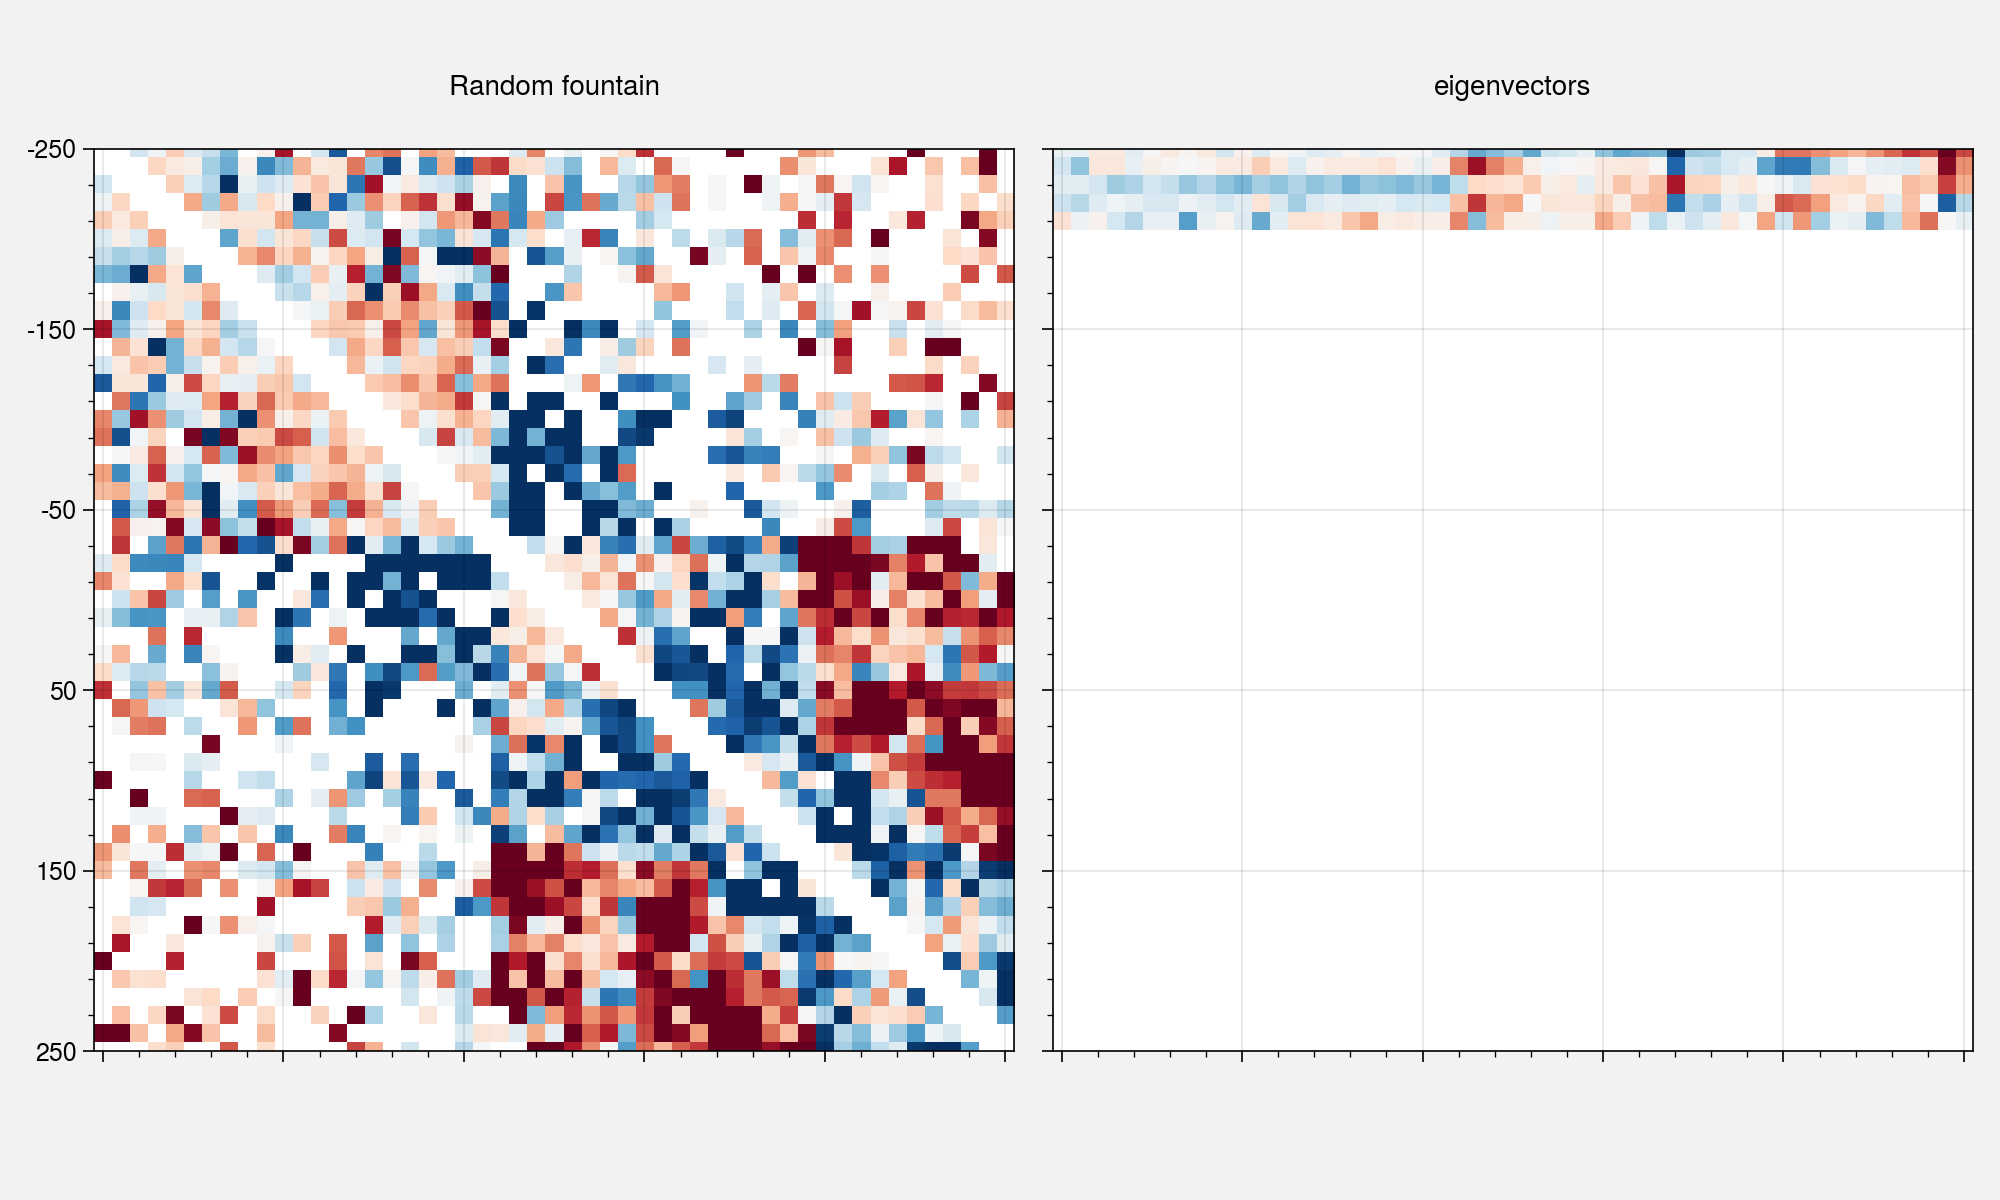

In [40]:
# Validate flipping:
idx = 401

snip = stack[:, :, idx]
eigs = components_flipped[:, :, idx]

f, axs = plt.subplots(
    figsize=(10, 6),
    nrows=1, 
    ncols=2,
    sharex=True, 
    sharey=True)

ax = axs[0]
ax.set_title('Random fountain')
im = ax.matshow(np.log2(snip), cmap='RdBu_r', vmax=1.5, vmin=-1.5); 

ax = axs[1]
ax.set_title('eigenvectors')
im1 = ax.matshow(eigs, cmap='RdBu'); 

ticks = np.arange(0, len(snip), 10)
ticklabels = (ticks*resolution_bp - flank_bp)//1000
for ax in axs:
    ax.set_yticks(ticks)
    ax.set_yticklabels(ticklabels)
    ax.set_xticks(ticks)
    ax.set_xticklabels([])
    ax.xaxis.tick_bottom()

f.tight_layout()

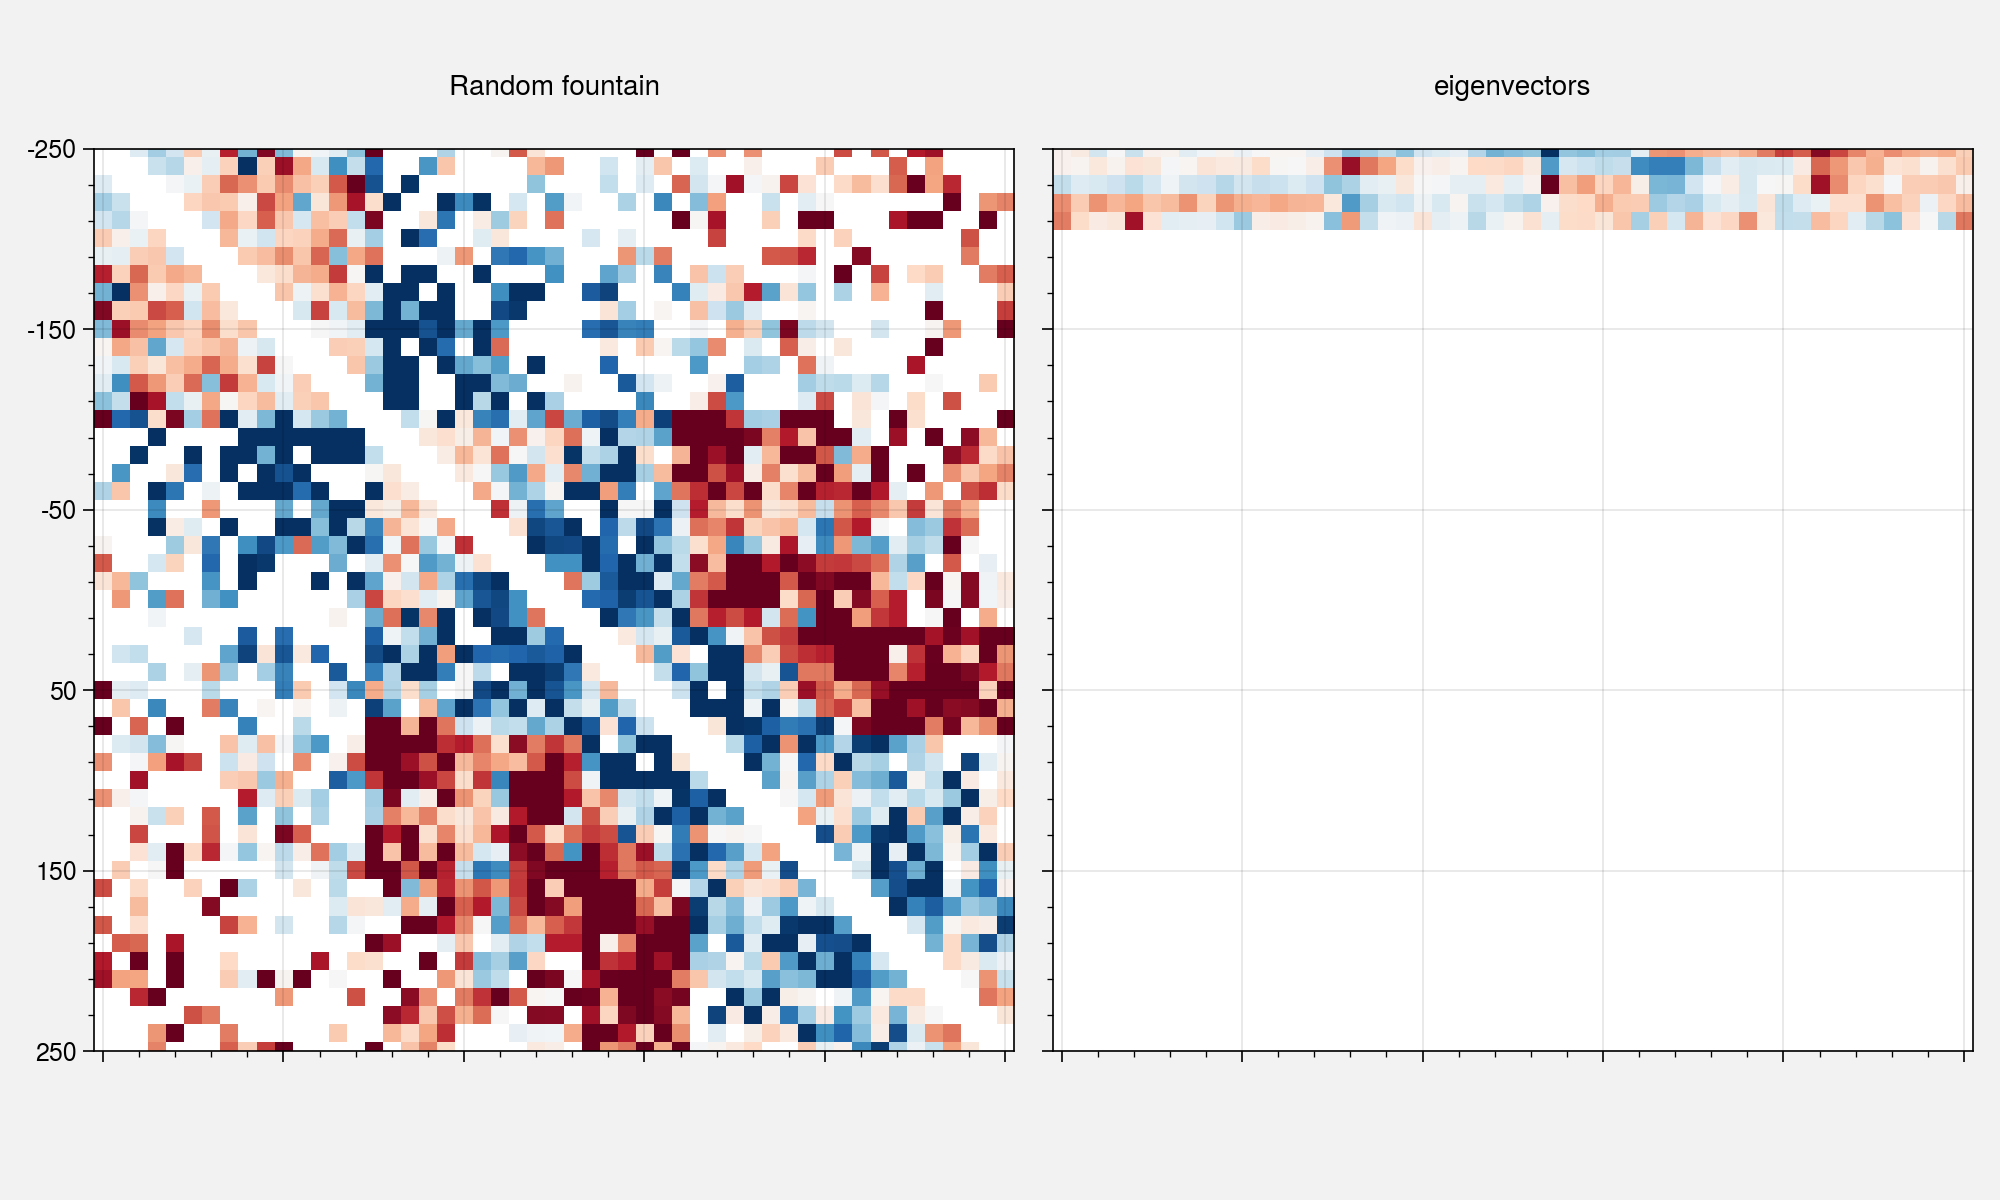

In [41]:
# Validate flipping:
idx = 408

snip = stack[:, :, idx]
eigs = components_flipped[:, :, idx]

f, axs = plt.subplots(
    figsize=(10, 6),
    nrows=1, 
    ncols=2,
    sharex=True, 
    sharey=True)

ax = axs[0]
ax.set_title('Random fountain')
im = ax.matshow(np.log2(snip), cmap='RdBu_r', vmax=1.5, vmin=-1.5); 

ax = axs[1]
ax.set_title('eigenvectors')
im1 = ax.matshow(eigs, cmap='RdBu'); 

ticks = np.arange(0, len(snip), 10)
ticklabels = (ticks*resolution_bp - flank_bp)//1000
for ax in axs:
    ax.set_yticks(ticks)
    ax.set_yticklabels(ticklabels)
    ax.set_xticks(ticks)
    ax.set_xticklabels([])
    ax.xaxis.tick_bottom()

f.tight_layout()

In [47]:
X = components_flipped.reshape( (41*n_eigs, genome_size) ).T
X[np.isnan(X)] = 0

mask = (X!=0).sum(axis=1)>0
X_no_zeros = X[mask]

ValueError: cannot reshape array of size 34184790 into shape (205,134058)

In [ ]:
X.shape, X_no_zeros.shape

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X_no_zeros)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

In [ ]:
X_embedded = pca.fit_transform(X)

In [ ]:
embedding = metadata.copy()
embedding['PC1'] = X_embedded[:, 0]
embedding['PC2'] = X_embedded[:, 1]
embedding['PC3'] = X_embedded[:, 2]

embedding['isFountain'] = pd.Series(
    embedding.FS_peaks.apply(lambda x: "true" if x>0.0001 else "false"), dtype="category")
embedding['isBroken'] = pd.Series(
    embedding.Scharr.apply(lambda x: "true" if x>0.2 else "false"), dtype="category")

In [ ]:
sns.distplot(embedding.PC1, color='red')
sns.distplot(embedding.PC2, color='blue')
sns.distplot(embedding.PC3, color='green')

In [ ]:
sns.distplot(embedding.FS_peaks.dropna(), color='red')

In [ ]:
sns.distplot(embedding.FS.dropna(), color='red')

In [ ]:
sns.distplot(embedding.Scharr.dropna(), color='blue')

In [ ]:
import datashader as ds
import datashader.transfer_functions as tf

In [ ]:
canvas = ds.Canvas(plot_width=300, plot_height=300, 
                   x_range=(-4,4), y_range=(-4,4), 
                   x_axis_type='linear', y_axis_type='linear')

In [ ]:
aggc_fs     = canvas.points(embedding, 'PC1', 'PC2', ds.by('isFountain', ds.count()))
aggc_scharr = canvas.points(embedding, 'PC1', 'PC2', ds.by('isBroken', ds.count()))

color_key = dict(true='blue', false='red')

tf.Images(
    tf.shade(tf.spread(aggc_fs,     px=1), name="Is Fountain?", color_key=color_key,),
    tf.shade(tf.spread(aggc_scharr, px=1), name="Is Broken?",color_key=color_key,)
)

In [ ]:
aggc_fs     = canvas.points(embedding, 'PC3', 'PC2', ds.by('isFountain', ds.count()))
aggc_scharr = canvas.points(embedding, 'PC3', 'PC2', ds.by('isBroken', ds.count()))

color_key = dict(true='blue', false='red')

tf.Images(
    tf.shade(tf.spread(aggc_fs,     px=1), name="Is Fountain?", color_key=color_key,),
    tf.shade(tf.spread(aggc_scharr, px=1), name="Is Broken?",color_key=color_key,)
)

In [ ]:
sns.scatterplot(x='PC1', y='PC2', data=embedding, linewidth=0, s=2)
sns.scatterplot(x='PC1', y='PC2', data=embedding.query('isFountain=="true"'), linewidth=0, s=3, color='red')
plt.xlim([-4, 4])
plt.ylim([-4, 4])

In [ ]:
sns.scatterplot(x='PC3', y='PC2', data=embedding, linewidth=0, s=2)
sns.scatterplot(x='PC3', y='PC2', data=embedding.query('isFountain=="true"'), linewidth=0, s=3, color='red')
plt.xlim([-4, 4])
plt.ylim([-4, 4])

In [ ]:
sns.scatterplot(x='PC1', y='PC2', data=embedding, linewidth=0, s=2)
sns.scatterplot(x='PC1', y='PC2', data=embedding.query('isBroken=="true"'), linewidth=0, s=3, color='red')
plt.xlim([-4, 4])
plt.ylim([-4, 4])

In [ ]:
sns.scatterplot(x='PC3', y='PC2', data=embedding, linewidth=0, s=2)
sns.scatterplot(x='PC3', y='PC2', data=embedding.query('isBroken=="true"'), linewidth=0, s=3, color='red')
plt.xlim([-4, 4])
plt.ylim([-4, 4])

In [ ]:
sns.scatterplot(x='PC1', y='PC2', data=embedding, linewidth=0, s=2)
sns.scatterplot(x='PC1', y='PC2', data=embedding.query('isBroken=="true" and isFountain=="true"'), linewidth=0, s=3, color='red')
plt.xlim([-4, 4])
plt.ylim([-4, 4])

## Embed only FS and Scharr score

In [143]:
X = metadata[['Scharr', 'FS']].fillna(0).values
X_no_zeros = metadata[['Scharr', 'FS']].dropna().values

In [144]:
X.shape, X_no_zeros.shape

((53628, 2), (51634, 2))

In [145]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_no_zeros)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[9.99994099e-01 5.90055248e-06]
[18.35506954  0.04458653]


In [146]:
X_embedded = pca.transform(X)

In [150]:
embedding = metadata.copy()
embedding['PC1'] = X_embedded[:, 0]
embedding['PC2'] = X_embedded[:, 1]

embedding['isFountain'] = pd.Series(
    embedding.FS.apply(lambda x: "true" if x>0.0003 else "false"), dtype="category")
embedding['isBroken'] = pd.Series(
    embedding.Scharr.apply(lambda x: "true" if x>0.15 else "false"), dtype="category")

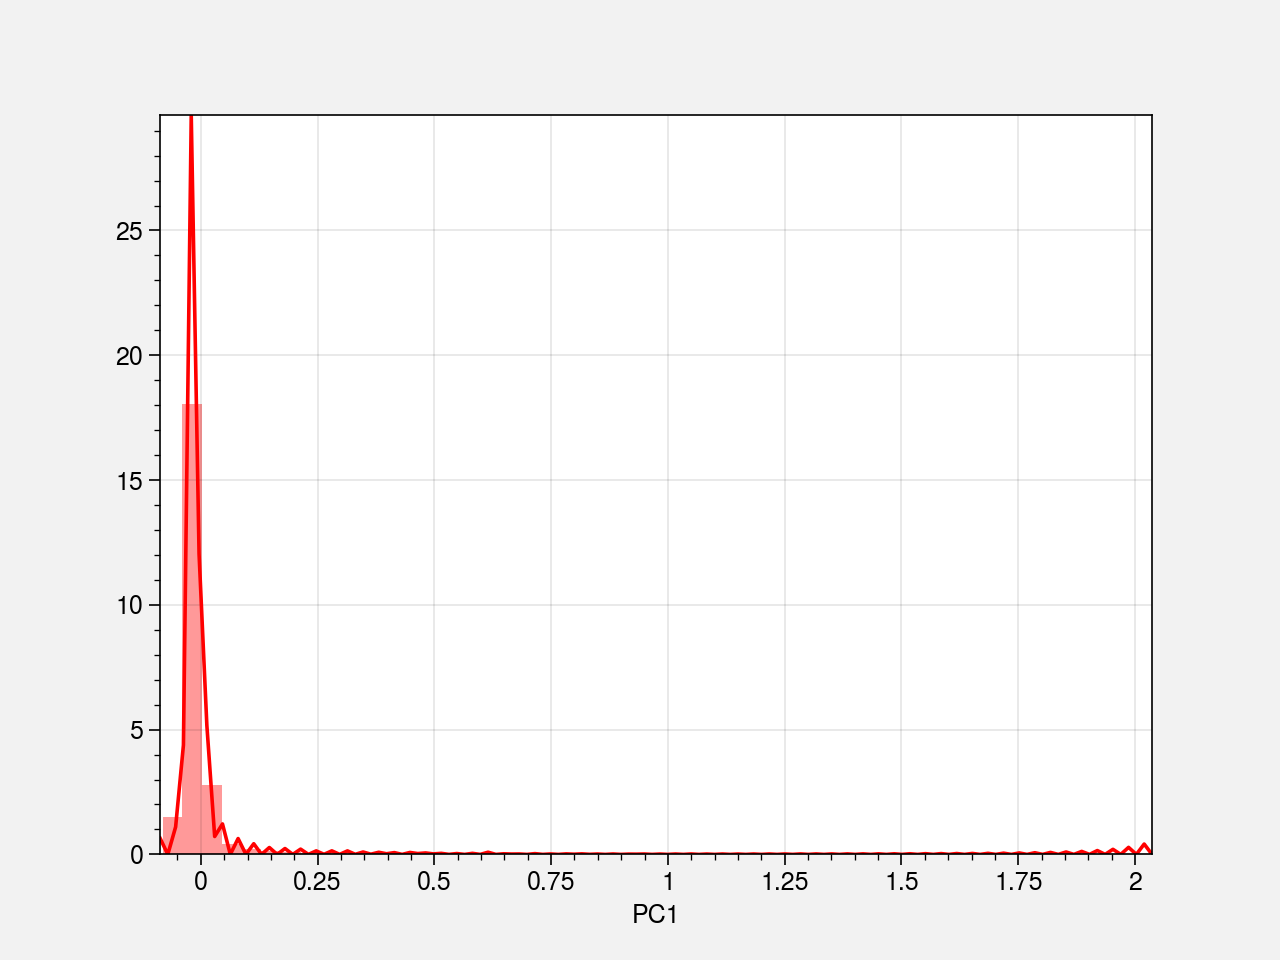

In [148]:
sns.distplot(embedding.PC1, color='red')

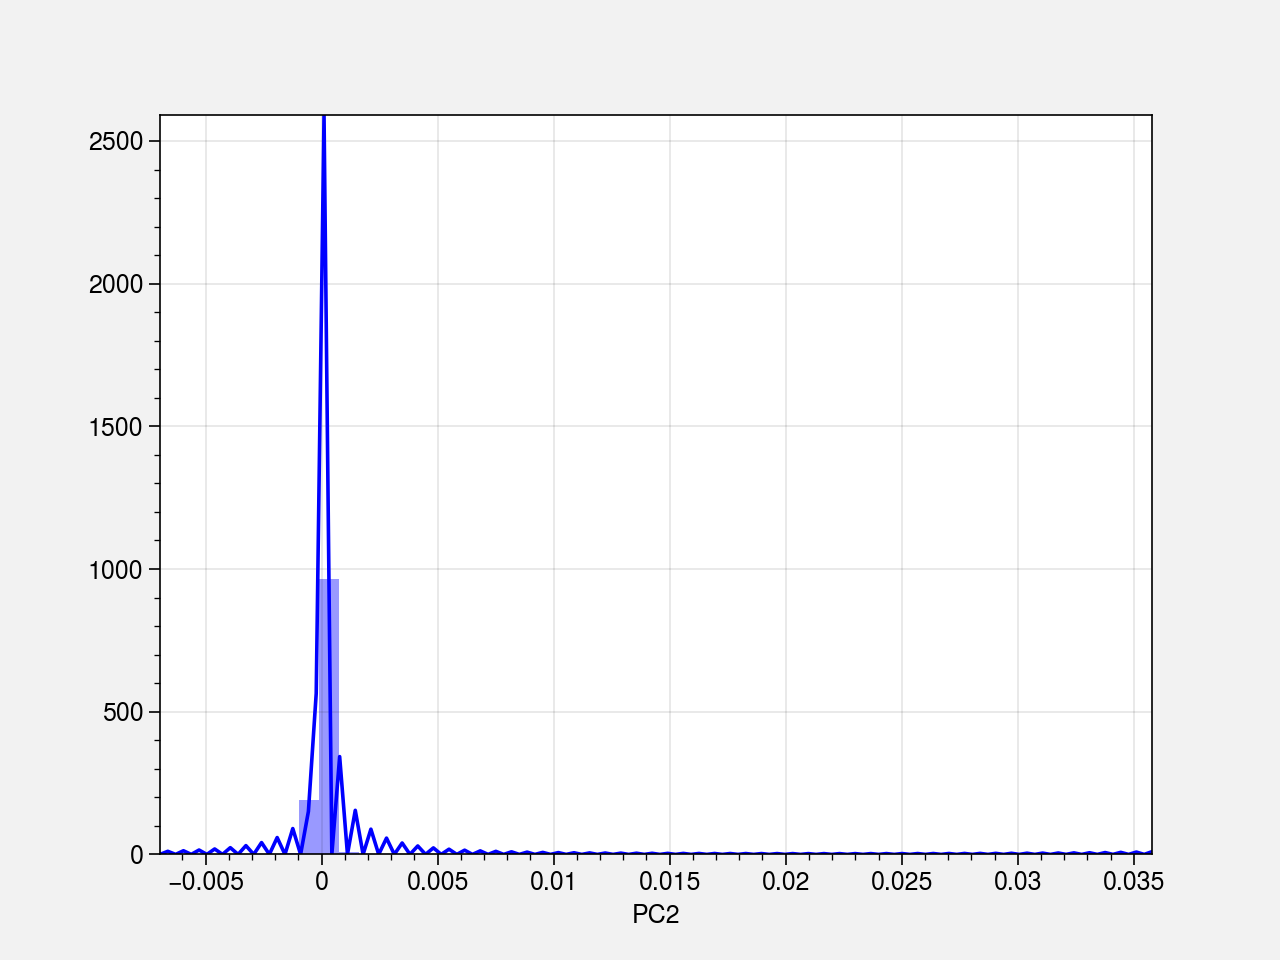

In [149]:
sns.distplot(embedding.PC2, color='blue')

In [151]:
canvas = ds.Canvas(plot_width=300, plot_height=300, 
                   x_range=(-0.2, 0.2), y_range=(-0.002, 0.002), 
                   x_axis_type='linear', y_axis_type='linear')


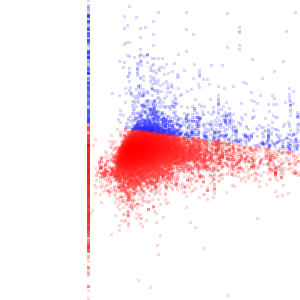
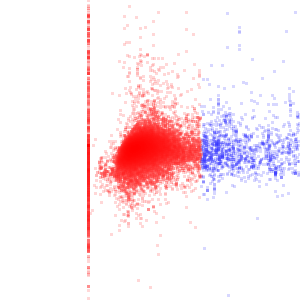

In [152]:
aggc_fs     = canvas.points(embedding, 'PC1', 'PC2', ds.by('isFountain', ds.count()))
aggc_scharr = canvas.points(embedding, 'PC1', 'PC2', ds.by('isBroken', ds.count()))

color_key = dict(true='blue', false='red')

tf.Images(
    tf.shade(tf.spread(aggc_fs,     px=1), name="Is Fountain?", color_key=color_key,),
    tf.shade(tf.spread(aggc_scharr, px=1), name="Is Broken?",color_key=color_key,)
)

### tSNE on Sharr and FS

In [153]:
from MulticoreTSNE import MulticoreTSNE as TSNE
tsne_model = TSNE(n_jobs=20).fit_transform(X)

In [154]:
embedding = metadata.copy()
embedding['V1'] = tsne_model[:, 0]
embedding['V2'] = tsne_model[:, 1]

embedding['isFountain'] = pd.Series(
    embedding.FS.apply(lambda x: "true" if x>0.0003 else "false"), dtype="category")
embedding['isBroken'] = pd.Series(
    embedding.Scharr.apply(lambda x: "true" if x>0.15 else "false"), dtype="category")

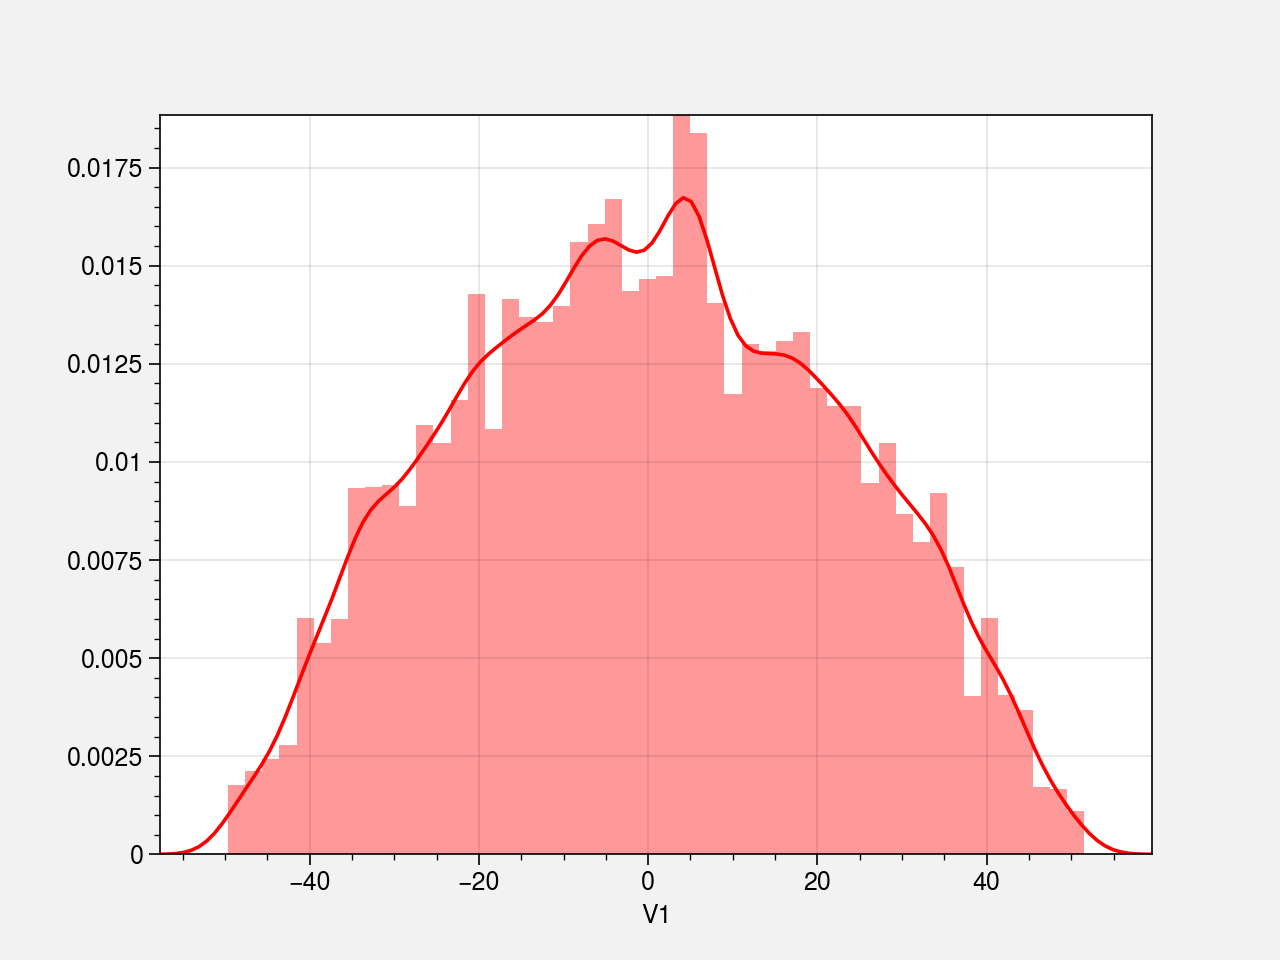

In [155]:
sns.distplot(embedding.V1, color='red')

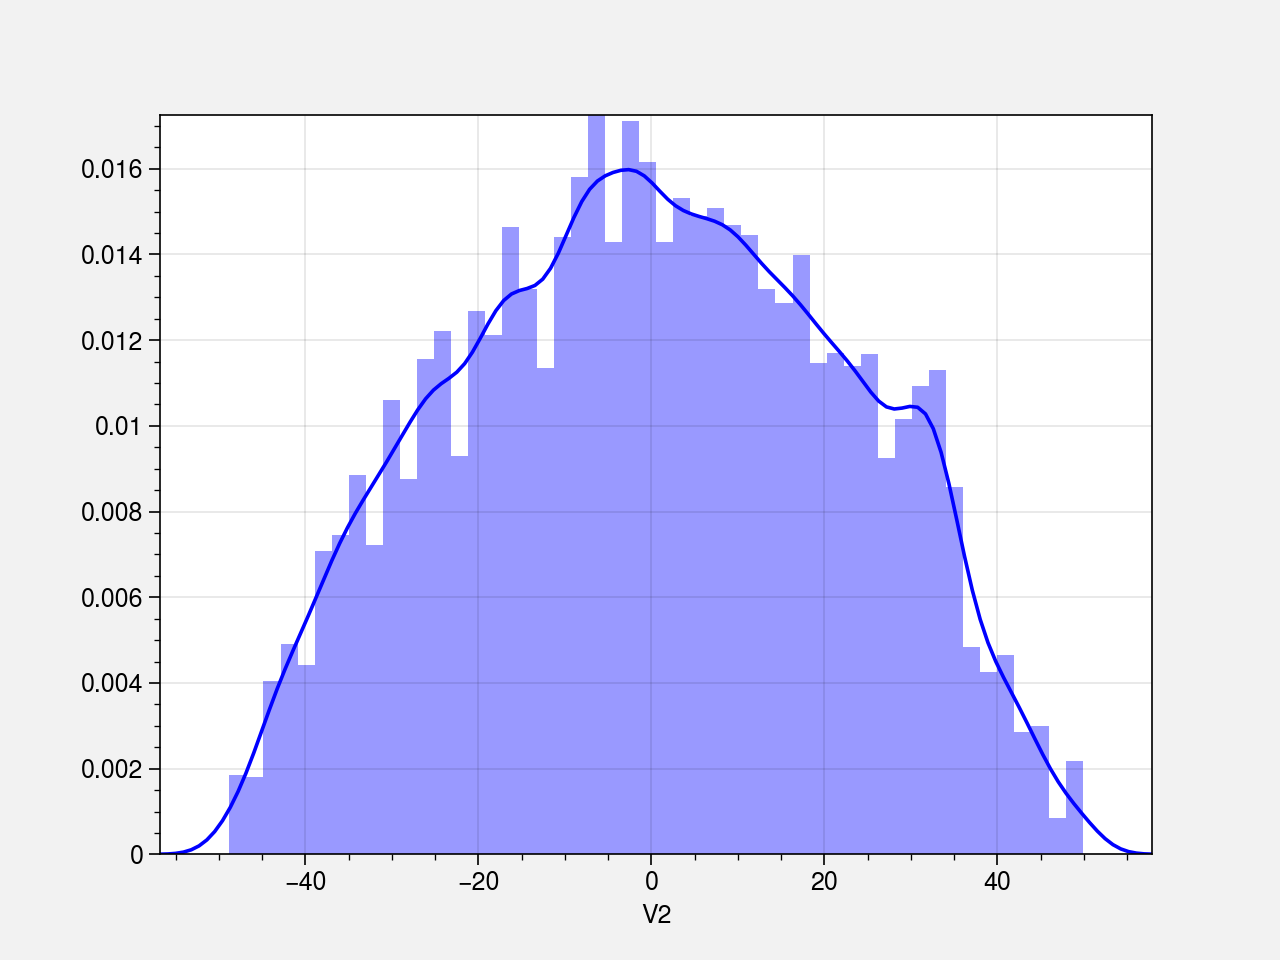

In [156]:
sns.distplot(embedding.V2, color='blue')

In [159]:
canvas = ds.Canvas(plot_width=300, plot_height=300, 
                   x_range=(-50, 50), y_range=(-50, 50), 
                   x_axis_type='linear', y_axis_type='linear')


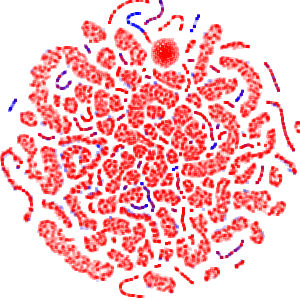
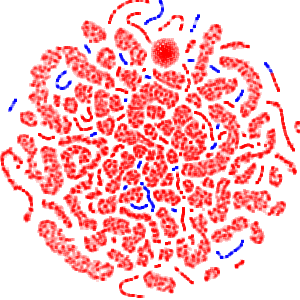

In [160]:
aggc_fs     = canvas.points(embedding, 'V1', 'V2', ds.by('isFountain', ds.count()))
aggc_scharr = canvas.points(embedding, 'V1', 'V2', ds.by('isBroken', ds.count()))

color_key = dict(true='blue', false='red')

tf.Images(
    tf.shade(tf.spread(aggc_fs,     px=1), name="Is Fountain?", color_key=color_key,),
    tf.shade(tf.spread(aggc_scharr, px=1), name="Is Broken?",color_key=color_key,)
)

## Correlation of the first N eigenvectors of snips with ideal fountain

In [161]:
n_eigs = 5
#genome_size = components.shape[2]

In [162]:
components = get_components(stack, n_eigs)

In [163]:
X = components_flipped.reshape( (41*n_eigs, genome_size) ).T
X[np.isnan(X)] = 0

In [164]:
corrs = np.array([
    scipy.stats.pearsonr(
        X[i],
        eigs_fountain[1:1+n_eigs, :].reshape( (41*n_eigs) ),
    )[0] for i in range(genome_size)
])

In [165]:
df = metadata.copy()
df['correlations'] = corrs

df['isFountain'] = pd.Series(
    df.FS.apply(lambda x: "true" if x>0.0003 else "false"), dtype="category")
df['isBroken'] = pd.Series(
    df.Scharr.apply(lambda x: "true" if x>0.1 else "false"), dtype="category")


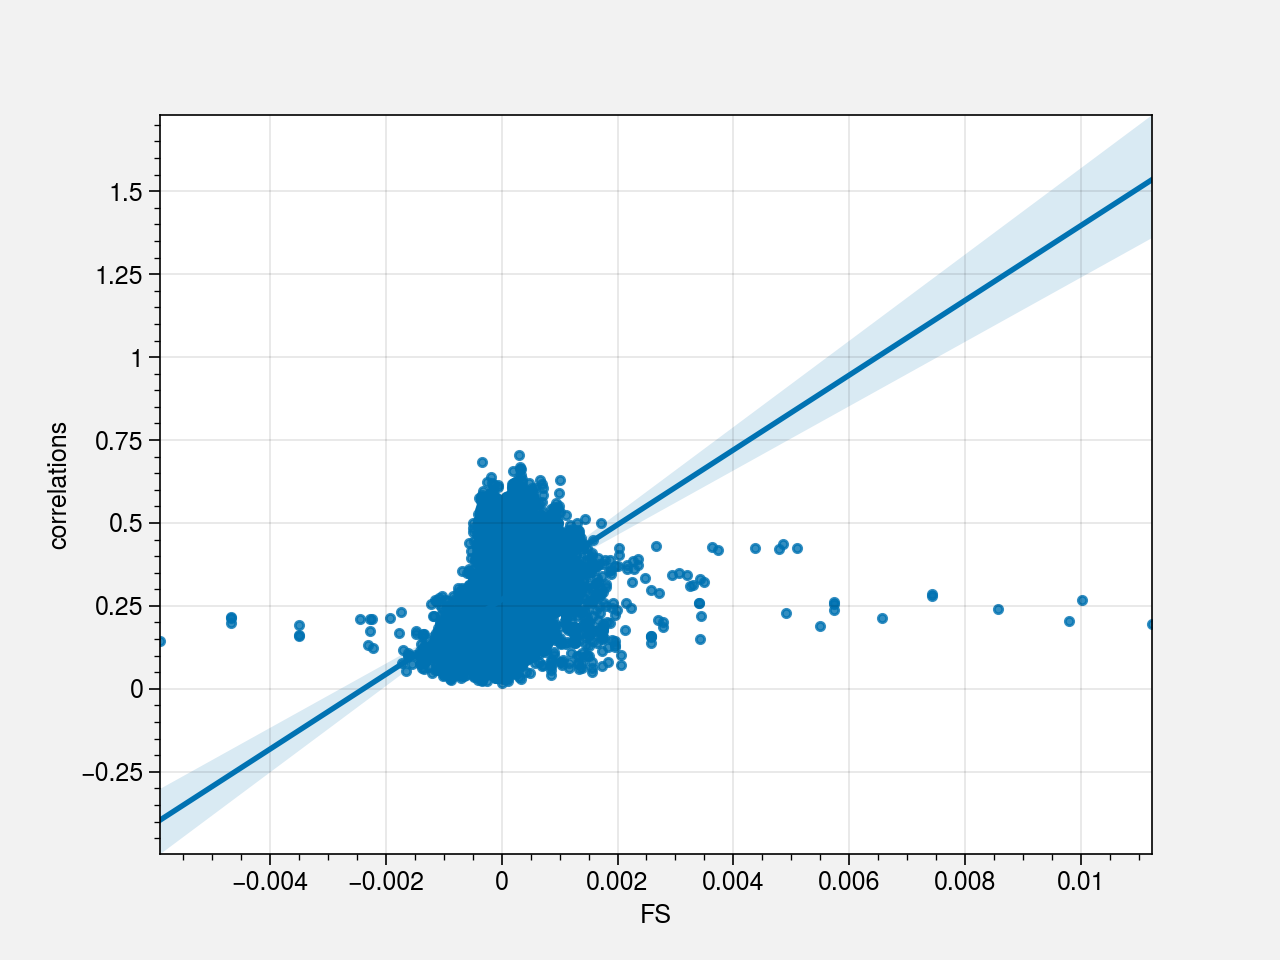

In [166]:
sns.regplot(x='FS', y='correlations', data=df)

In [171]:
canvas = ds.Canvas(plot_width=500, plot_height=500, 
                   x_range=(-0.002, 0.002), y_range=(-0, 0.7), 
                   x_axis_type='linear', y_axis_type='linear')


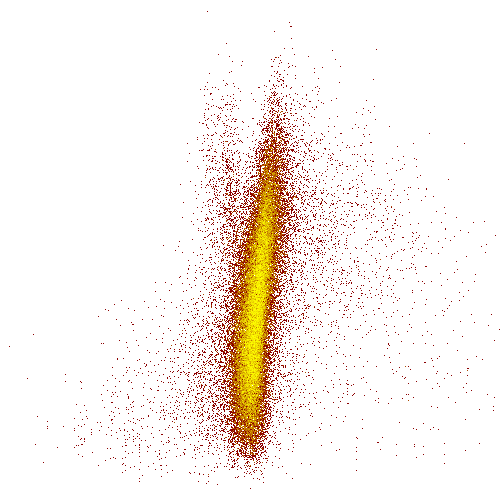
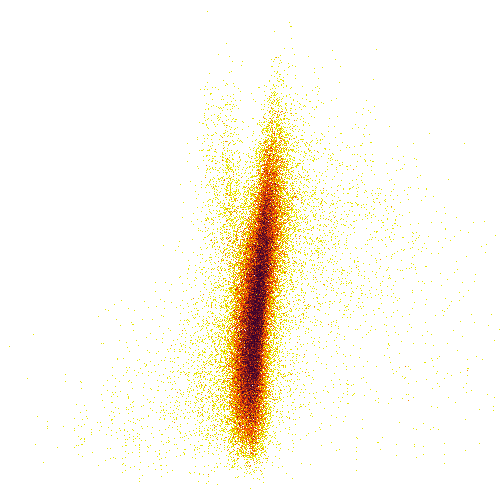
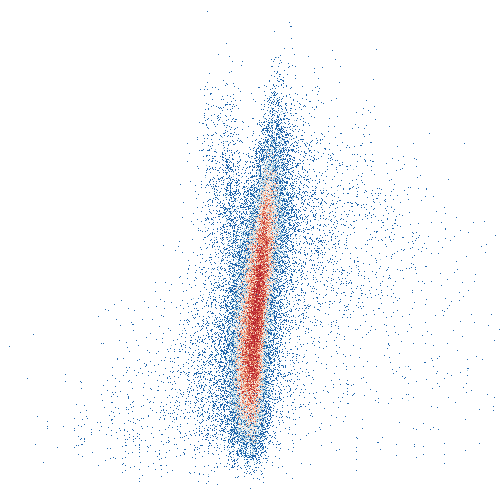

In [172]:
agg  = canvas.points(df, 'FS', 'correlations')

from bokeh.palettes import RdBu9
tf.Images(tf.shade(agg,cmap=["darkred", "yellow"], name="darkred, yellow"),
          tf.shade(agg,cmap=[(230,230,0), "orangered", "#300030"], name="yellow, orange red, dark purple"), 
          tf.shade(agg,cmap=list(RdBu9), name="Bokeh RdBu9"))


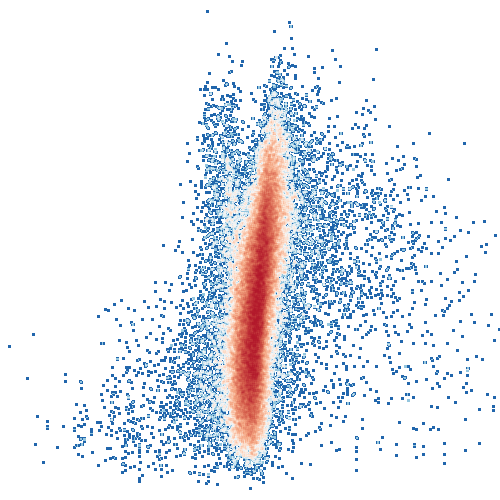

In [173]:
tf.Images(tf.shade(tf.spread(agg, px=1), cmap=list(RdBu9), name="Bokeh RdBu9"))


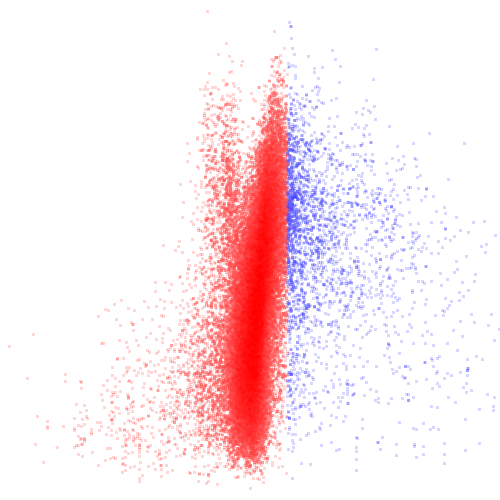
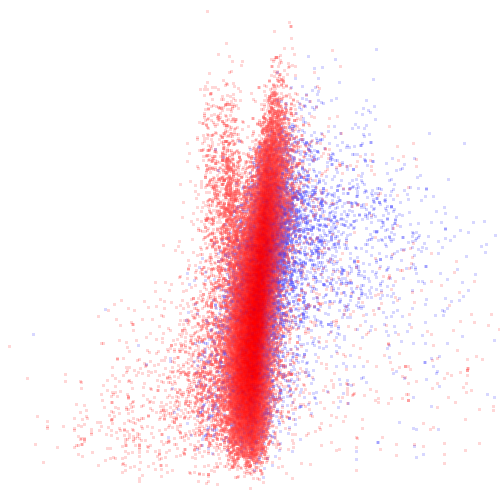

In [174]:
aggc_fs     = canvas.points(df, 'FS', 'correlations', ds.by('isFountain', ds.count()))
aggc_scharr = canvas.points(df, 'FS', 'correlations', ds.by('isBroken', ds.count()))

color_key = dict(true='blue', false='red')

tf.Images(
    tf.shade(tf.spread(aggc_fs,     px=1), name="Is Fountain?", color_key=color_key,),
    tf.shade(tf.spread(aggc_scharr, px=1), name="Is Broken?",color_key=color_key,)
)


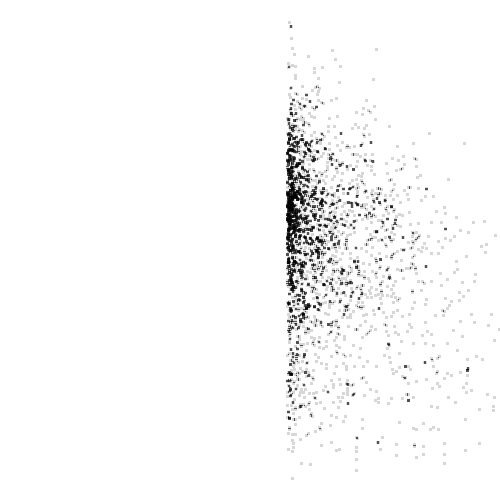
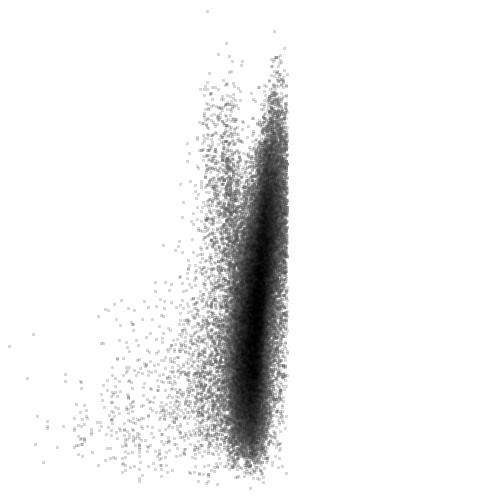

In [179]:
agg1 = canvas.points(df.query('isFountain=="true"'),  'FS', 'correlations')
agg2 = canvas.points(df.query('isFountain=="false"'), 'FS', 'correlations')

canvas = ds.Canvas(plot_width=500, plot_height=500, 
                   x_range=(-0.002, 0.002), y_range=(-0, 0.7), 
                   x_axis_type='linear', y_axis_type='linear')

tf.Images(
    tf.shade( tf.spread(agg1, px=1), cmap='black'),
    tf.shade( tf.spread(agg2, px=1), cmap='black')
)


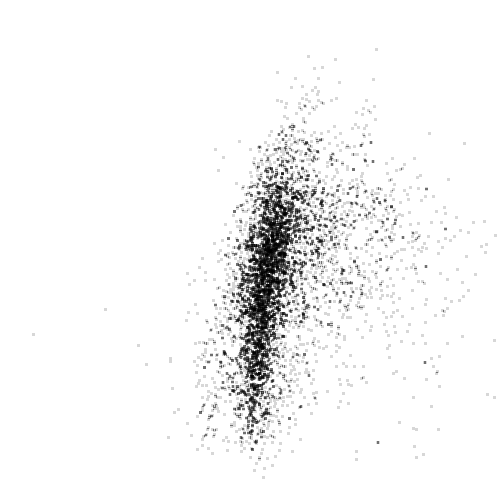
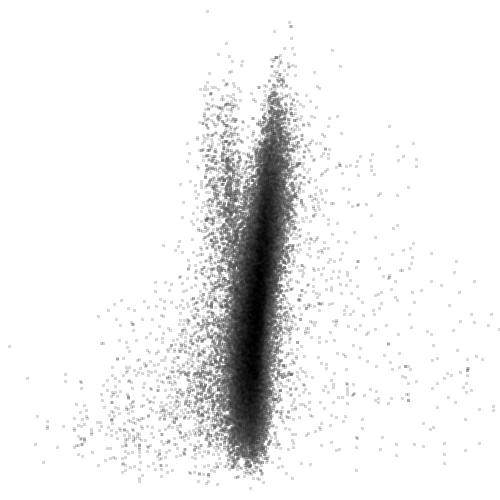

In [180]:
agg1 = canvas.points(df.query('isBroken=="true"'),  'FS', 'correlations')
agg2 = canvas.points(df.query('isBroken=="false"'), 'FS', 'correlations')

canvas = ds.Canvas(plot_width=500, plot_height=500, 
                   x_range=(-0.002, 0.002), y_range=(-0, 0.7), 
                   x_axis_type='linear', y_axis_type='linear')

tf.Images(
    tf.shade( tf.spread(agg1, px=1), cmap='black'),
    tf.shade( tf.spread(agg2, px=1), cmap='black')
)

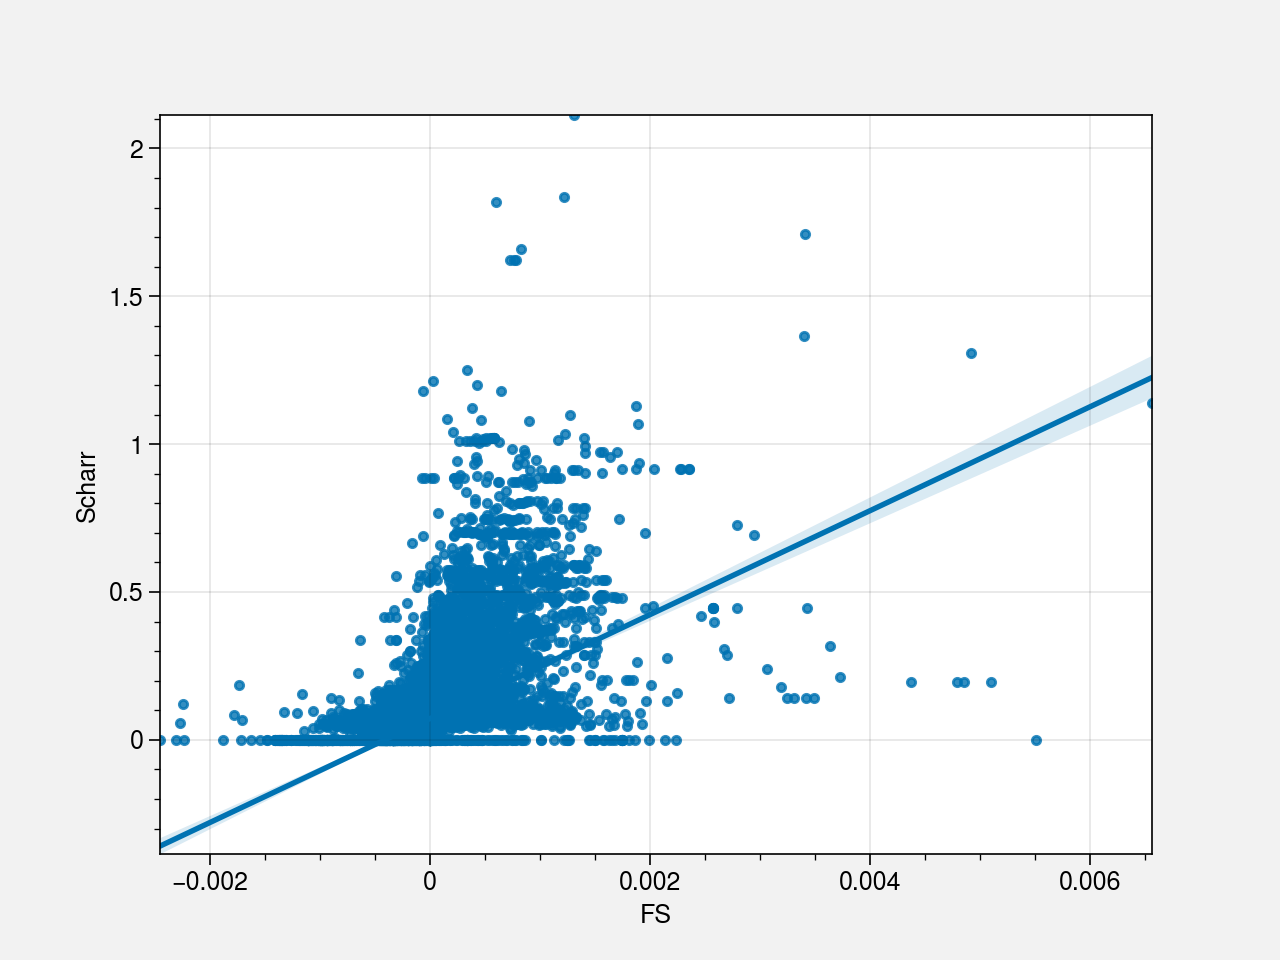

In [182]:
sns.regplot(x='FS', y='Scharr', data=df)

In [183]:
canvas = ds.Canvas(plot_width=500, plot_height=500, 
                   x_range=(-0.0015, 0.0025), y_range=(-0, 1.2), 
                   x_axis_type='linear', y_axis_type='linear')


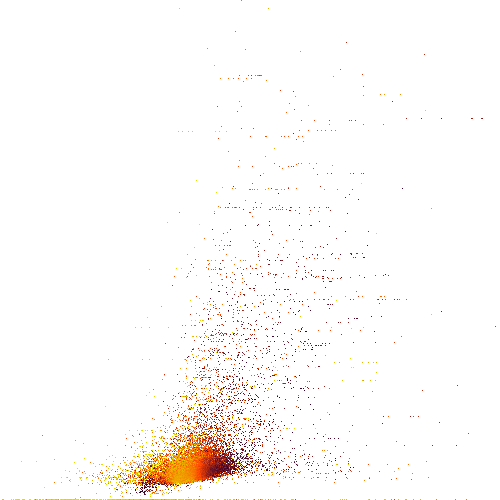

In [184]:
tf.Images(tf.shade( canvas.points(df, 'FS', 'Scharr', ds.mean("correlations")), 
                   cmap=[(230,230,0), "orangered", "#300030"]))


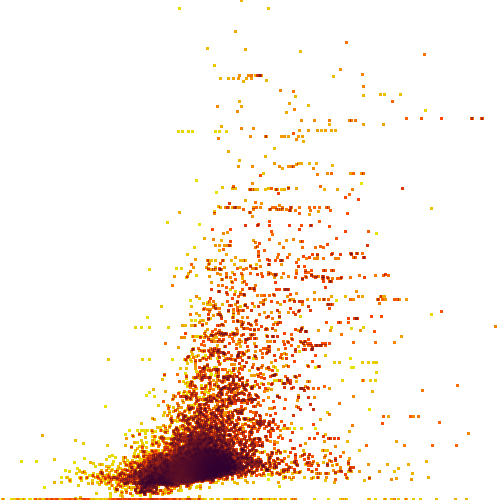

In [185]:
aggv = canvas.points(df, 'FS', 'Scharr', ds.mean("correlations"))
tf.Images(tf.shade( tf.spread(aggv,     px=1), 
                   cmap=[(230,230,0), "orangered", "#300030"]))


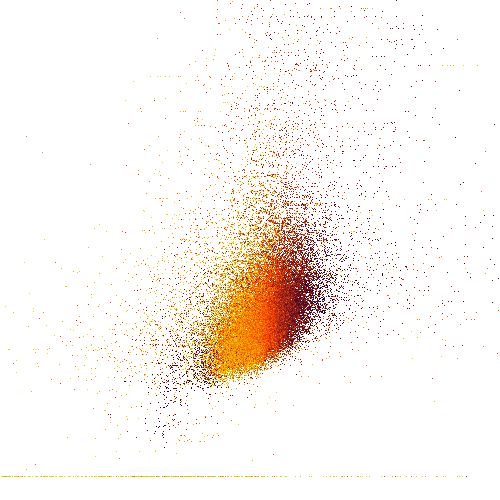
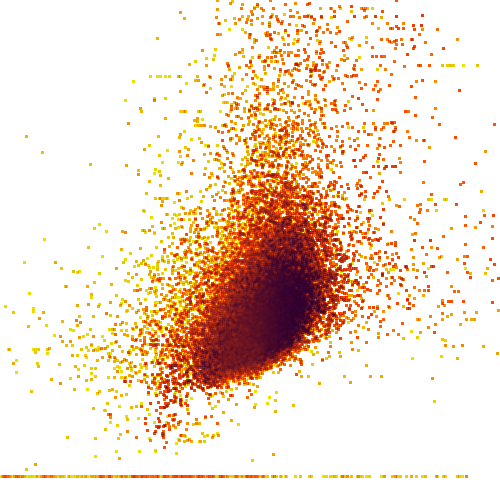

In [186]:
canvas = ds.Canvas(plot_width=500, plot_height=500, 
                   x_range=(-0.001, 0.001), y_range=(-0.01, 0.2), 
                   x_axis_type='linear', y_axis_type='linear')

aggv = canvas.points(df, 'FS', 'Scharr', ds.mean("correlations"))

tf.Images(
    tf.shade( aggv, cmap=[(230,230,0), "orangered", "#300030"]),
    tf.shade( tf.spread(aggv,     px=1), cmap=[(230,230,0), "orangered", "#300030"])
)


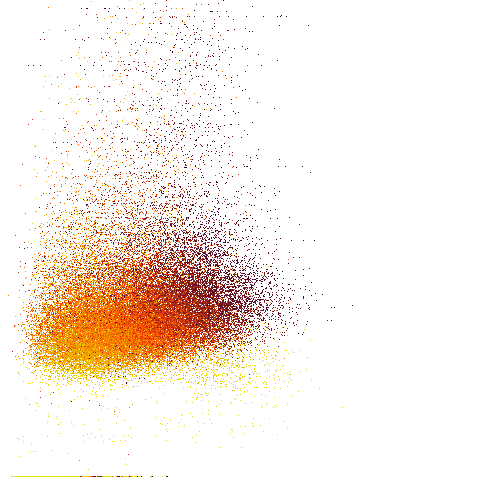
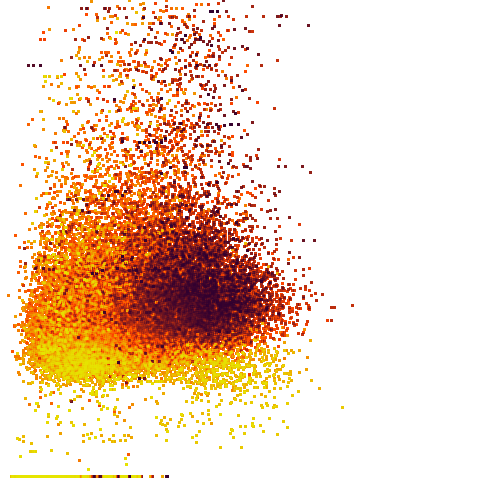

In [187]:
canvas = ds.Canvas(plot_width=500, plot_height=500, 
                   x_range=(-0, 1), y_range=(-0.01, 0.2), 
                   x_axis_type='linear', y_axis_type='linear')

aggv = canvas.points(df, 'correlations', 'Scharr', ds.mean("FS"))

tf.Images(
    tf.shade( aggv, cmap=[(230,230,0), "orangered", "#300030"]),
    tf.shade( tf.spread(aggv,     px=1), cmap=[(230,230,0), "orangered", "#300030"])
)


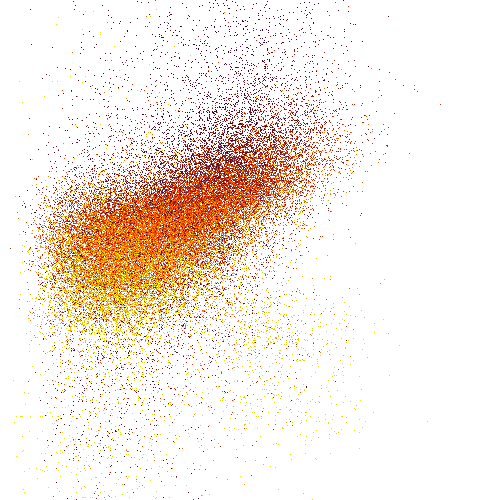
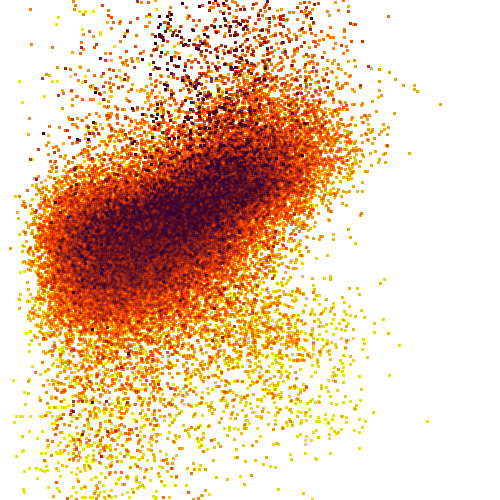

In [188]:
canvas = ds.Canvas(plot_width=500, plot_height=500, 
                   x_range=(-0, 0.8), y_range=(-0.0005, 0.0005), 
                   x_axis_type='linear', y_axis_type='linear')

aggv = canvas.points(df, 'correlations', 'FS', ds.mean("Scharr"))

tf.Images(
    tf.shade( aggv, cmap=[(230,230,0), "orangered", "#300030"]),
    tf.shade( tf.spread(aggv,   shape='square',  px=1), cmap=[(230,230,0), "orangered", "#300030"])
)


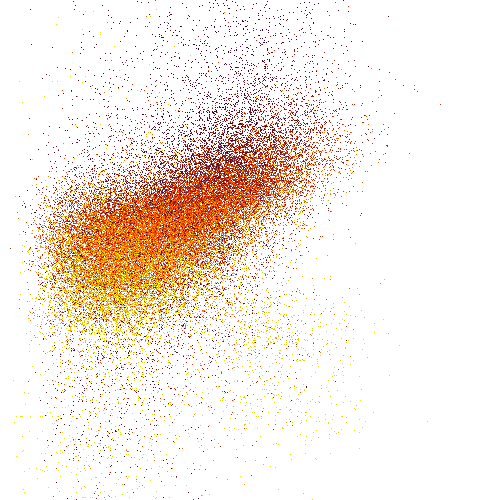
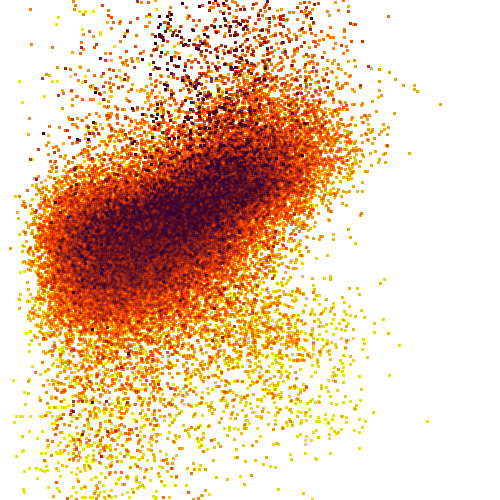

In [189]:
canvas = ds.Canvas(plot_width=500, plot_height=500, 
                   x_range=(-0, 0.8), y_range=(-0.0005, 0.0005), 
                   x_axis_type='linear', y_axis_type='linear')

aggv = canvas.points(df, 'correlations', 'FS', ds.mean("Scharr"))

tf.Images(
    tf.shade( aggv, cmap=[(230,230,0), "orangered", "#300030"]),
    tf.shade( tf.spread(aggv,   shape='square',  px=1), cmap=[(230,230,0), "orangered", "#300030"])
)


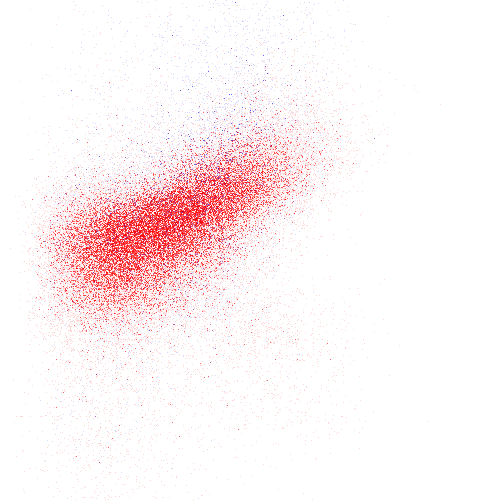
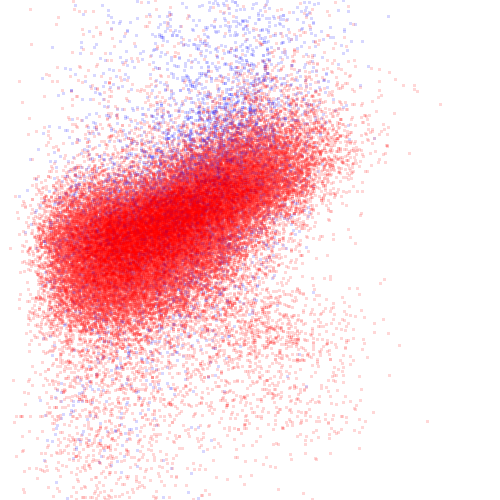

In [190]:
canvas = ds.Canvas(plot_width=500, plot_height=500, 
                   x_range=(-0, 0.8), y_range=(-0.0005, 0.0005), 
                   x_axis_type='linear', y_axis_type='linear')

aggc = canvas.points( df, 'correlations', 'FS', ds.by('isBroken', ds.count()) )

color_key = dict(true='blue', false='red')

tf.Images(
    tf.shade( aggc, color_key=color_key),
    tf.shade( tf.spread(aggc,   shape='square',  px=1), color_key=color_key)
)

In [191]:
agg  = canvas.points(df, 'FS', 'correlations')


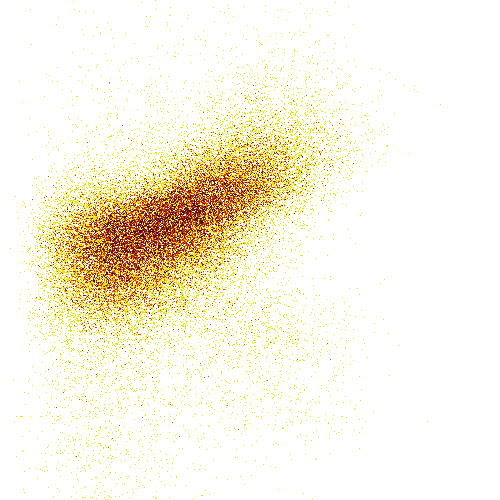
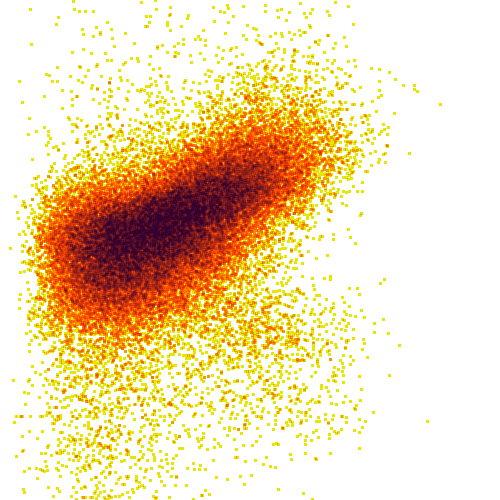

In [192]:
canvas = ds.Canvas(plot_width=500, plot_height=500, 
                   x_range=(-0, 0.8), y_range=(-0.0005, 0.0005), 
                   x_axis_type='linear', y_axis_type='linear')

agg = canvas.points( df.query('isBroken=="false"'), 'correlations', 'FS' )

color_key = dict(true='blue', false='red')

tf.Images(
    tf.shade( agg, cmap=[(230,230,0), "orangered", "#300030"]),
    tf.shade( tf.spread(agg,   shape='square',  px=1), cmap=[(230,230,0), "orangered", "#300030"])
)


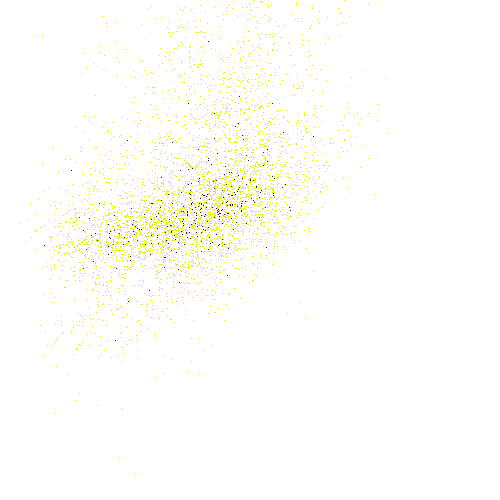
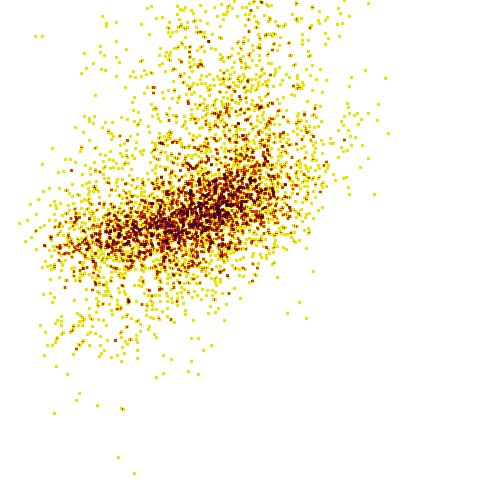

In [193]:
canvas = ds.Canvas(plot_width=500, plot_height=500, 
                   x_range=(-0, 0.8), y_range=(-0.001, 0.001), 
                   x_axis_type='linear', y_axis_type='linear')

agg = canvas.points( df.query('isBroken=="true"'), 'correlations', 'FS' )

color_key = dict(true='blue', false='red')

tf.Images(
    tf.shade( agg, cmap=[(230,230,0), "orangered", "#300030"]),
    tf.shade( tf.spread(agg,   shape='square',  px=1), cmap=[(230,230,0), "orangered", "#300030"])
)


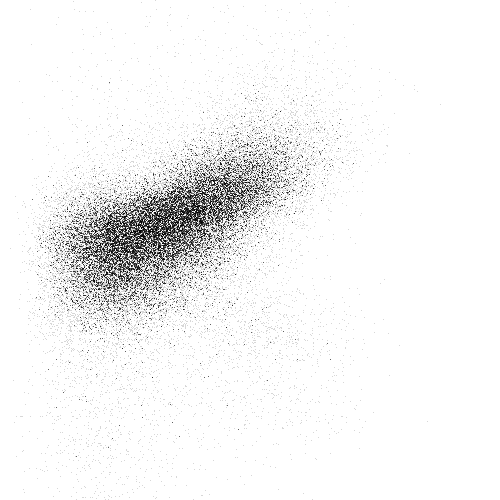
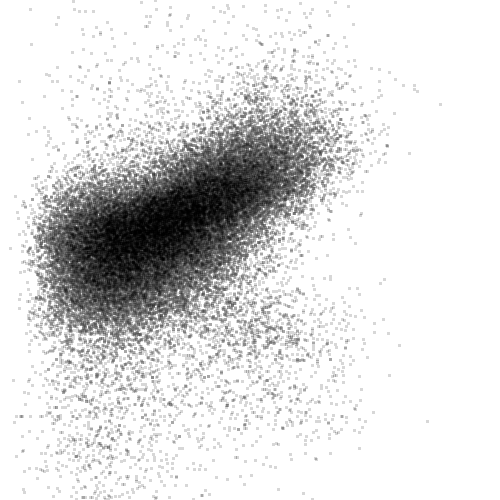

In [194]:
canvas = ds.Canvas(plot_width=500, plot_height=500, 
                   x_range=(-0, 0.8), y_range=(-0.0005, 0.0005), 
                   x_axis_type='linear', y_axis_type='linear')

agg = canvas.points( df.query('isBroken=="false"'), 'correlations', 'FS' )

color_key = dict(true='blue', false='red')

tf.Images(
    tf.shade( agg, cmap='black'),
    tf.shade( tf.spread(agg,   shape='square',  px=1), cmap='black')
)


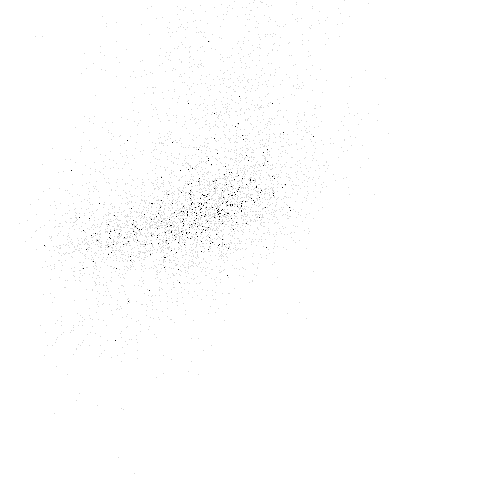
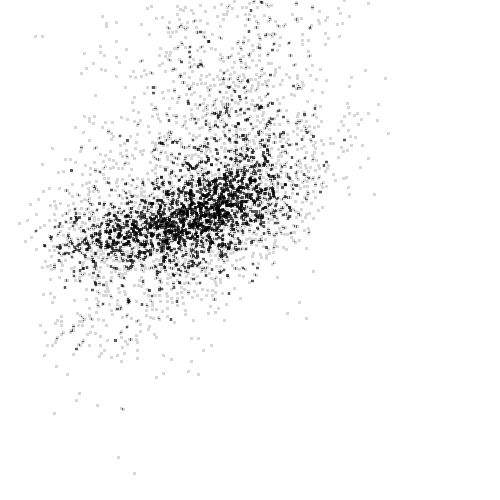

In [195]:
canvas = ds.Canvas(plot_width=500, plot_height=500, 
                   x_range=(-0, 0.8), y_range=(-0.001, 0.001), 
                   x_axis_type='linear', y_axis_type='linear')

agg = canvas.points( df.query('isBroken=="true"'), 'correlations', 'FS' )

color_key = dict(true='blue', false='red')

tf.Images(
    tf.shade( agg, cmap='black'),
    tf.shade( tf.spread(agg,   shape='square',  px=1), cmap='black')
)